# <strong>EDA & Preprocessing</strong>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [28]:
def load_data(file_path):
    """Load the dataset and print basic information"""
    df = pd.read_csv(file_path,index_col="ID")
    print("1. Basic Dataset Information:")
    print("-" * 50)
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nFirst few rows:")
    print(df.head())
    df = df.drop(columns="Unnamed: 75")
    # df.columns = [col[-20:] for col in df.columns]
    return df


def analyze_missing_values(df):
    """Analyze and visualize missing values"""
    print("\n2. Missing Values Analysis:")
    print("-" * 50)
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100

    missing_info = pd.DataFrame(
        {"Missing Values": missing_values, "Missing Percentage": missing_percentages}
    )

    print(missing_info[missing_info["Missing Values"] > 0])

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(missing_percentages)), missing_percentages)
    plt.xticks(range(len(missing_percentages)), df.columns, rotation=90)
    plt.title("Percentage of Missing Values by Column")
    plt.ylabel("Percentage")
    plt.tight_layout()
    plt.show()

    return missing_info


def identify_column_types(df):
    """Identify and categorize columns by data type"""
    numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
    categorical_columns = df.select_dtypes(include=["object"]).columns

    print("\n3. Column Type Analysis:")
    print("-" * 50)
    print("\nNumeric columns:", len(numeric_columns))
    print(numeric_columns.tolist())
    print("\nCategorical columns:", len(categorical_columns))
    print(categorical_columns.tolist())

    return numeric_columns, categorical_columns


def analyze_numeric_features(df, numeric_columns):
    """Analyze numeric features with statistics and distributions"""
    print("\n4. Numeric Features Analysis:")
    print("-" * 50)
    print("\nBasic statistics:")
    print(df[numeric_columns].describe())

    # Distribution plots for numeric columns
    n_cols = len(numeric_columns)
    if n_cols > 0:
        fig, axes = plt.subplots(
            nrows=min(3, (n_cols + 2) // 3),
            ncols=min(3, n_cols),
            figsize=(15, 5 * ((n_cols + 2) // 3)),
        )
        axes = axes.flatten() if n_cols > 1 else [axes]

        for idx, col in enumerate(numeric_columns[:9]):  # Limit to 9 plots
            sns.histplot(data=df, x=col, ax=axes[idx])
            axes[idx].set_title(f"Distribution of {col}")
            axes[idx].tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.show()

    # Correlation analysis
    plt.figure(figsize=(30, 30))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.show()


def analyze_categorical_features(df, categorical_columns):
    """Analyze categorical features with value counts and visualizations"""
    print("\n5. Categorical Features Analysis:")
    print("-" * 50)

    for col in categorical_columns:
        print(f"\nValue counts for {col}:")
        value_counts = df[col].value_counts()
        print(value_counts)

        # Plot bar chart for each categorical column
        plt.figure(figsize=(10, 5))
        value_counts.plot(kind="bar")
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def handle_missing_values(df, numeric_columns, categorical_columns):
    """Handle missing values in both numeric and categorical columns"""
    # For numeric columns, fill with median
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())

    # For categorical columns, fill with mode
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df


def handle_outliers(df, numeric_columns):
    """Handle outliers using IQR method"""
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

In [29]:
df = load_data("dataset.csv")

1. Basic Dataset Information:
--------------------------------------------------
Number of rows: 1525
Number of columns: 75

First few rows:
     Program of Study  Gender Nationality Place of Birth  \
ID                                                         
1.0  Computer Science    Male   Pakistani         Punjab   
2.0  Computer Science    Male   Pakistani         Punjab   
3.0  Computer Science  Female   Pakistani            KPK   
4.0  Computer Science    Male   Pakistani         Punjab   
5.0  Computer Science  Female   Pakistani         Punjab   

    My current semester is: Father's Education Mother's Education  \
ID                                                                  
1.0                     6th       Intermediate       Intermediate   
2.0                     8th             Matric       Below Matric   
3.0                     8th       Intermediate             Matric   
4.0                     6th             Matric       Below Matric   
5.0                     

In [30]:
df

Program of Study  Gender Nationality Place of Birth  \
ID                                                         
1.0  Computer Science    Male   Pakistani         Punjab   
2.0  Computer Science    Male   Pakistani         Punjab   
3.0  Computer Science  Female   Pakistani            KPK   
4.0  Computer Science    Male   Pakistani         Punjab   
5.0  Computer Science  Female   Pakistani         Punjab   
..                ...     ...         ...            ...   
NaN               NaN     NaN         NaN            NaN   
NaN               NaN     NaN         NaN            NaN   
NaN               NaN     NaN         NaN            NaN   
NaN               NaN     NaN         NaN            NaN   
NaN               NaN     NaN         NaN            NaN   

    My current semester is: Father's Education Mother's Education  \
ID                                                                  
1.0                     6th       Intermediate       Intermediate   
2.0                     8th             Matric       Below Matric   
3.0                     8th       Intermediate             Matric   
4.0                     6th             Matric       Below Matric   
5.0                     8th             Matric                 BS   
..                      ...                ...                ...   
NaN                     NaN                NaN                NaN   
NaN                     NaN                NaN                NaN   
NaN                     NaN                NaN                NaN   
NaN                     NaN                NaN                NaN   
NaN                     NaN                NaN                NaN   

      Parental Income  \
ID                      
1.0         Below 30K   
2.0  Between 50K~1Lac   
3.0  Between 50K~1Lac   
4.0         Below 30K   
5.0   Between 30K~50K   
..                ...   
NaN               NaN   
NaN               NaN   
NaN               NaN   
NaN               NaN   
NaN               NaN   

    Any close family member with the same profession available for guidance  \
ID                                                                            
1.0                                                 NO                        
2.0                                                 NO                        
3.0                                                YES                        
4.0                                                 NO                        
5.0                                                 NO                        
..                                                 ...                        
NaN                                                NaN                        
NaN                                                NaN                        
NaN                                                NaN                        
NaN                                                NaN                        
NaN                                                NaN                        

    Availing any scholarship  ...  \
ID                            ...   
1.0                       NO  ...   
2.0                       NO  ...   
3.0                      YES  ...   
4.0                      YES  ...   
5.0                      YES  ...   
..                       ...  ...   
NaN                      NaN  ...   
NaN                      NaN  ...   
NaN                      NaN  ...   
NaN                      NaN  ...   
NaN                      NaN  ...   

     I prefer to revise the lectures daily or before the next class of the same subject.  \
ID                                                                                         
1.0                                                3.0                                     
2.0                                                1.0                                     
3.0                                                3.0                                     
4.0                           


2. Missing Values Analysis:
--------------------------------------------------
                                                    Missing Values  \
Program of Study                                                18   
Gender                                                          18   
Nationality                                                     18   
Place of Birth                                                  18   
My current semester is:                                         18   
...                                                            ...   
My classes schedule is usually very tight that ...              18   
I often come across health issues that effect m...              18   
My preferable mode of study is:                                 18   
My preferable time of study is:                                 18   
My overall mobile usage (daily) for non-academi...              18   

                                                    Missing Percentage  
Progra

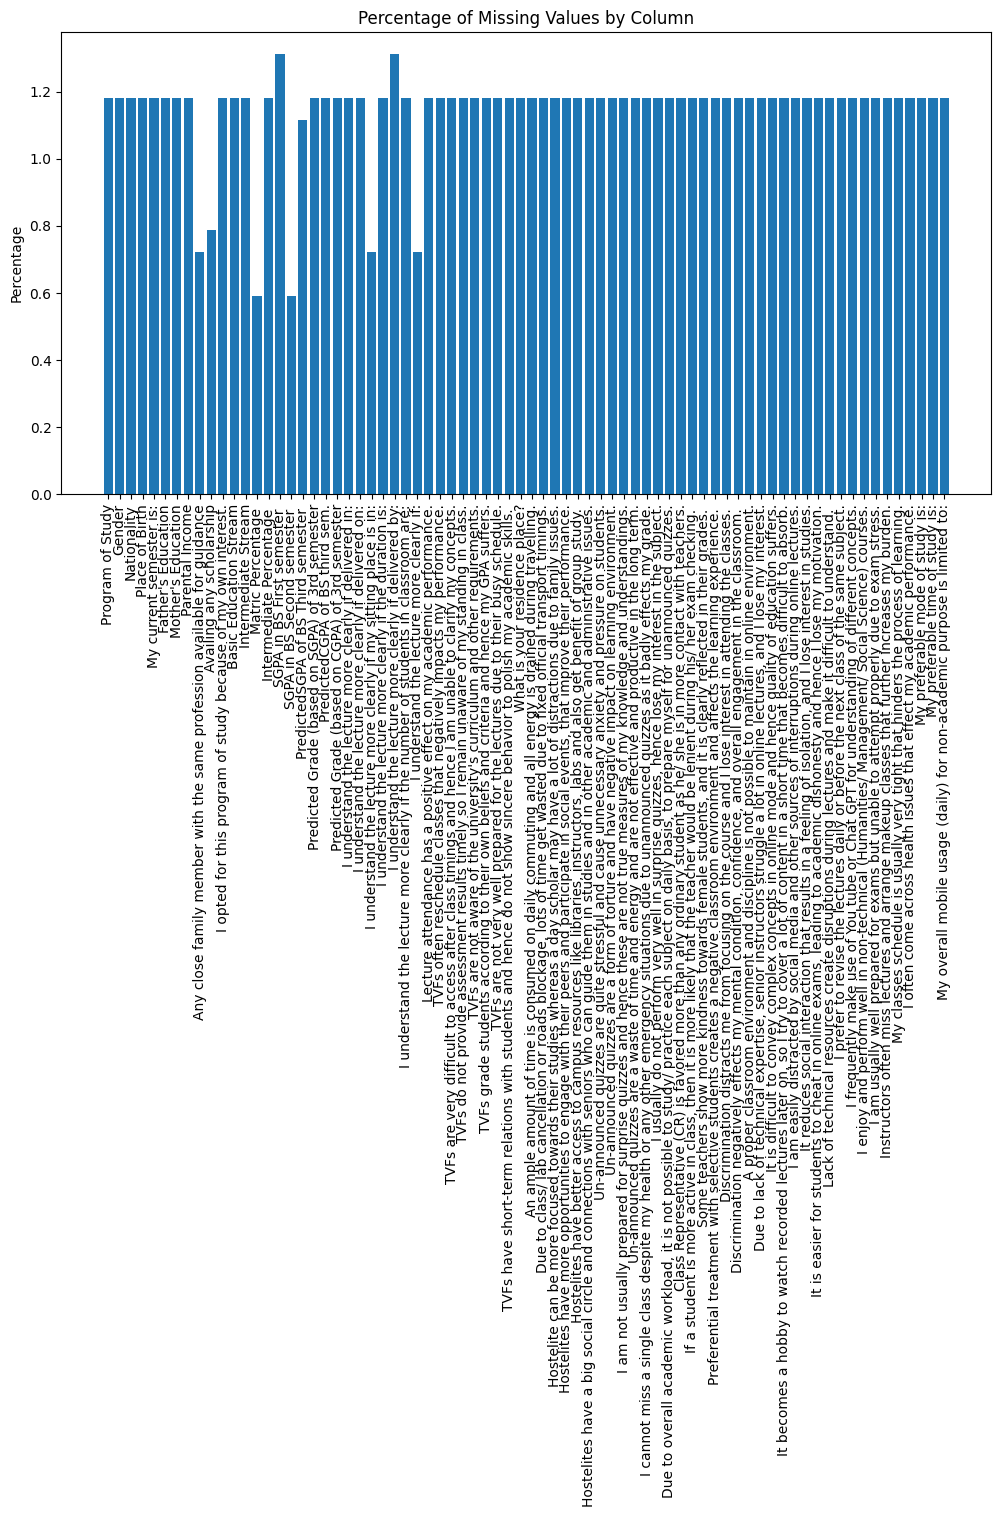

Missing Values  \
Program of Study                                                18   
Gender                                                          18   
Nationality                                                     18   
Place of Birth                                                  18   
My current semester is:                                         18   
...                                                            ...   
My classes schedule is usually very tight that ...              18   
I often come across health issues that effect m...              18   
My preferable mode of study is:                                 18   
My preferable time of study is:                                 18   
My overall mobile usage (daily) for non-academi...              18   

                                                    Missing Percentage  
Program of Study                                              1.180328  
Gender                                                        1.180328  
Nationality                                                   1.180328  
Place of Birth                                                1.180328  
My current semester is:                                       1.180328  
...                                                                ...  
My classes schedule is usually very tight that ...            1.180328  
I often come across health issues that effect m...            1.180328  
My preferable mode of study is:                               1.180328  
My preferable time of study is:                               1.180328  
My overall mobile usage (daily) for non-academi...            1.180328  

[74 rows x 2 columns]

In [31]:
analyze_missing_values(df)

In [32]:
numeric_columns, categorical_columns = identify_column_types(df)


3. Column Type Analysis:
--------------------------------------------------

Numeric columns: 47
['I opted for this program of study because of my own interest.', 'Intermediate Percentage ', 'SGPA in BS First semester ', 'PredictedCGPA of BS third sem.', 'Lecture attendance has a positive effect on my academic performance.', 'TVFs often reschedule classes that negatively impacts my performance.', 'TVFs are very difficult to access after class timings and hence I am unable to clarify my concepts.', 'TVFs do not provide assessment results timely so I remain unaware of my standing in class.', "TVFs are not aware of the university's curriculum and other requirements.", 'TVFs grade students according to their own beliefs and criteria and hence my GPA suffers.', 'TVFs are not very well prepared for the lectures due to their busy schedule.', 'TVFs have short-term relations with students and hence do not show sincere behavior to polish my academic skills. ', 'What is your residence place?', '


4. Numeric Features Analysis:
--------------------------------------------------

Basic statistics:
       I opted for this program of study because of my own interest.  \
count                                        1507.000000               
mean                                            3.747180               
std                                             1.077562               
min                                             1.000000               
25%                                             3.000000               
50%                                             4.000000               
75%                                             5.000000               
max                                             5.000000               

       Intermediate Percentage   SGPA in BS First semester   \
count               1507.000000                 1505.000000   
mean                  78.784800                    2.947947   
std                    9.870401                    0.534142  

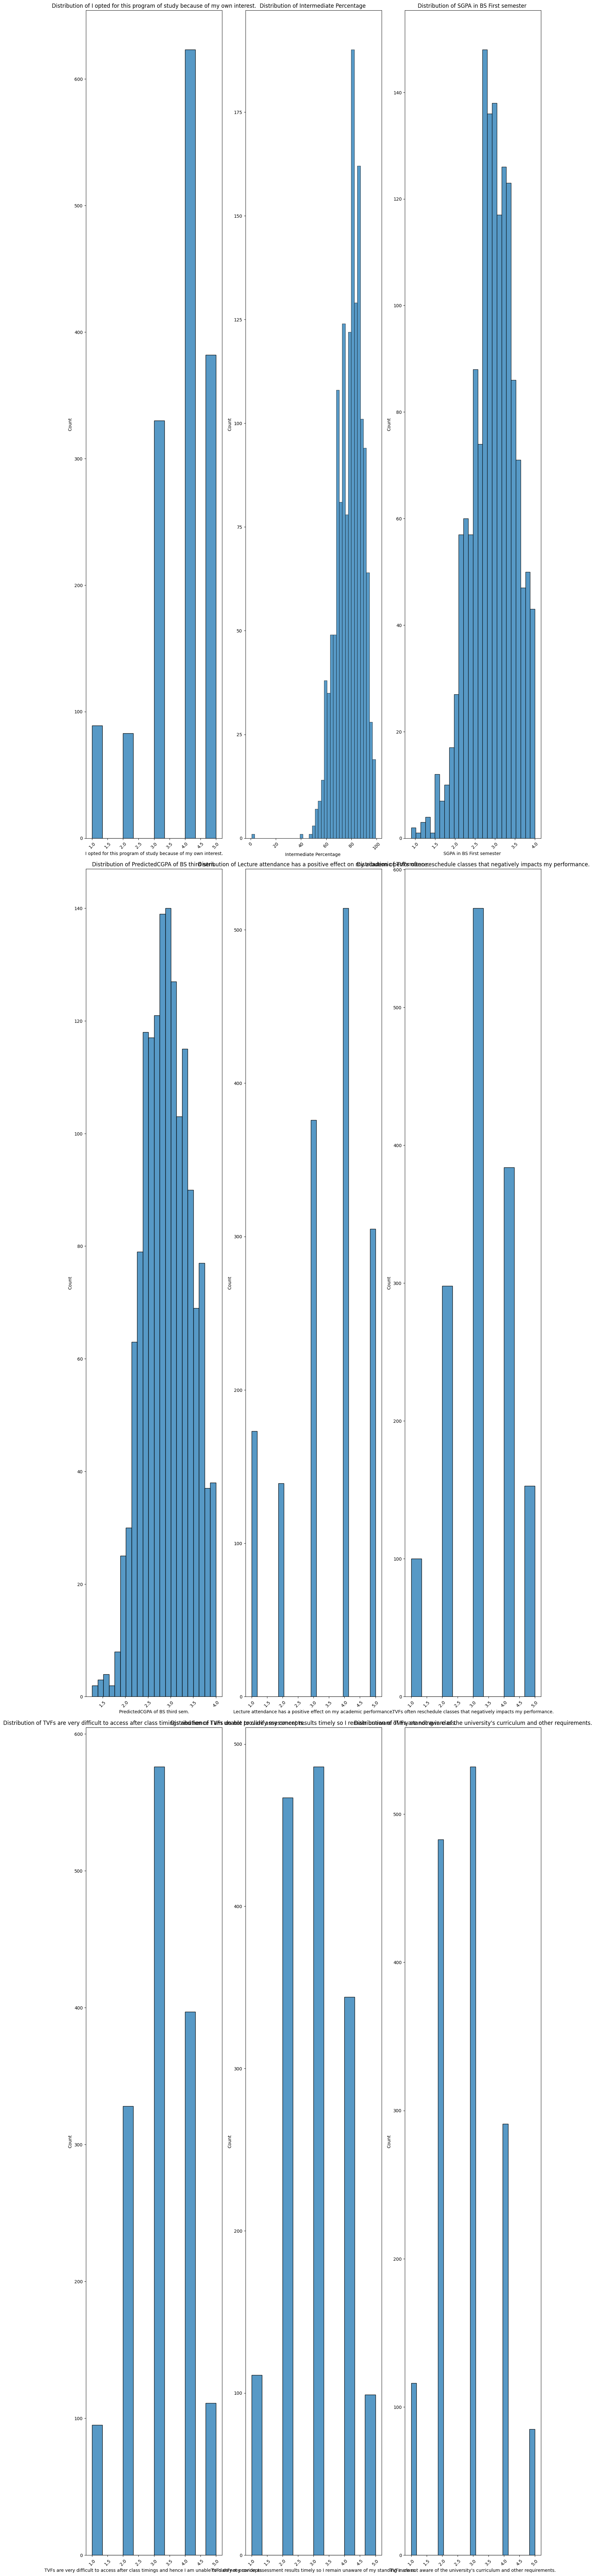

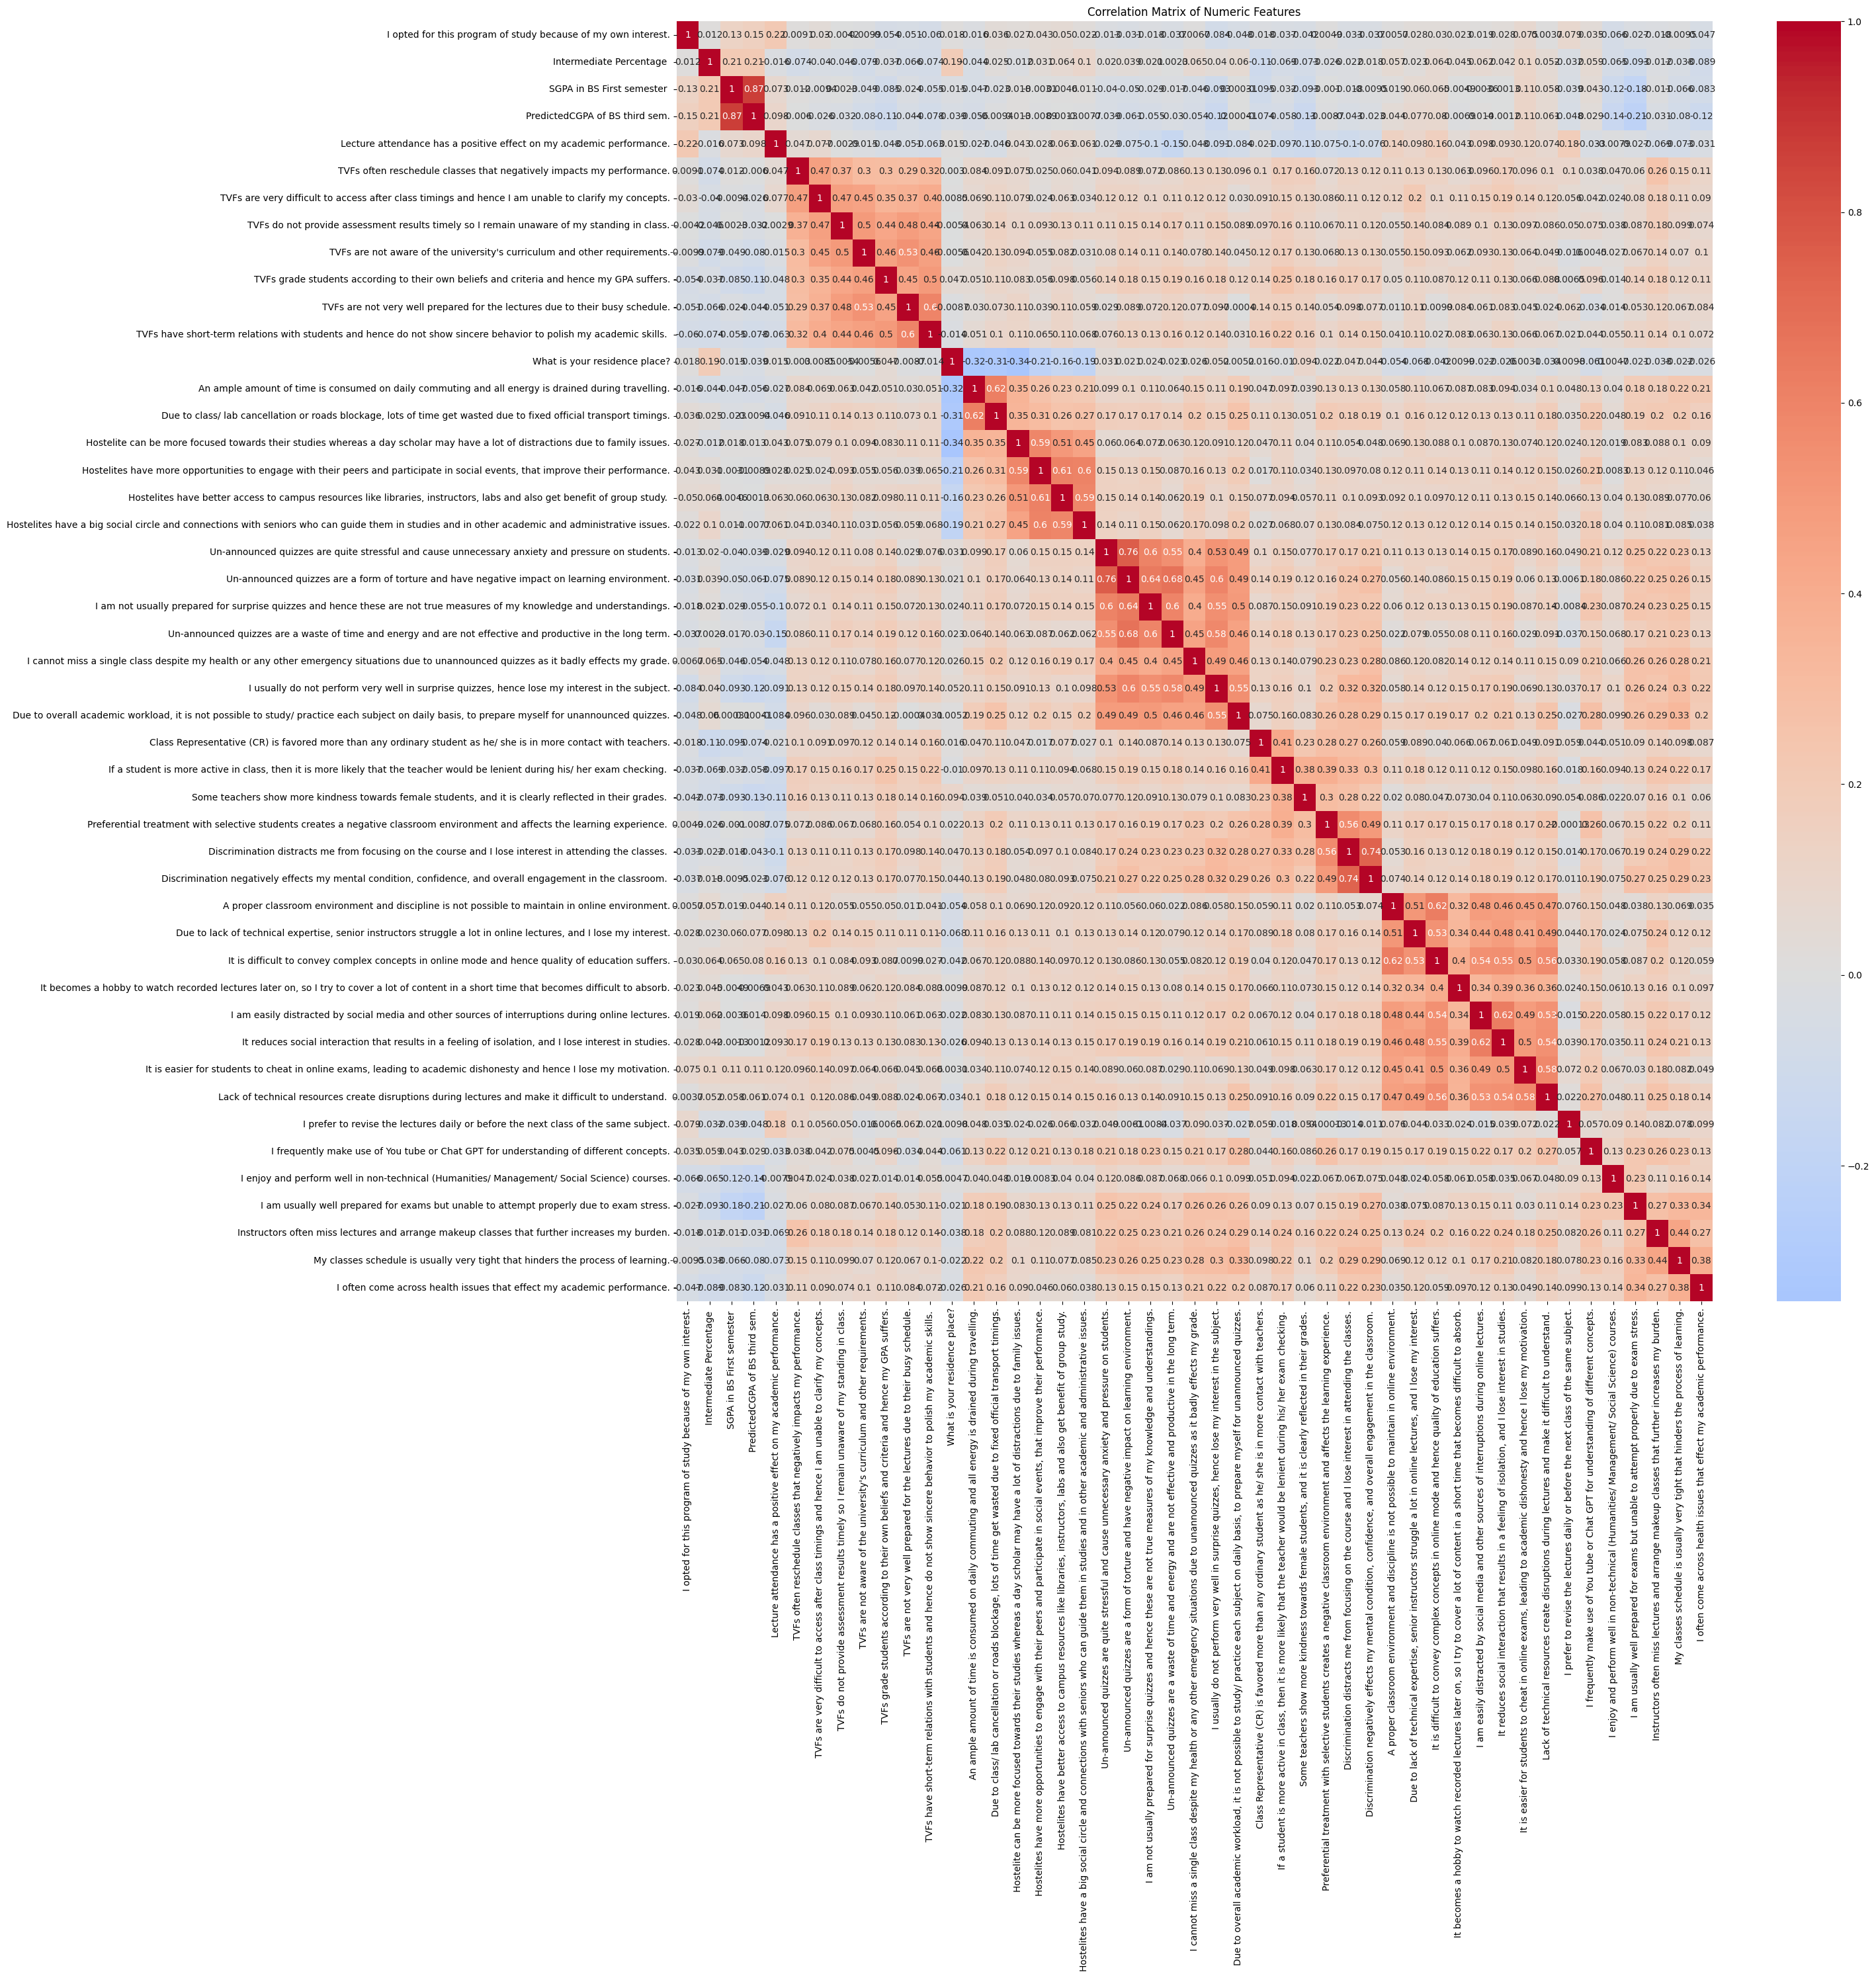

In [33]:
analyze_numeric_features(df, numeric_columns)


5. Categorical Features Analysis:
--------------------------------------------------

Value counts for Program of Study:
Program of Study
Computer Science          412
Electrical Engineering    271
Mechanical Engineering    117
Aerospace Engineering     105
Avionics Engineering       90
                         ... 
Martine sciences            1
Software Engineer           1
BIOINFORMATICS              1
Marine Sciences             1
Marine science              1
Name: count, Length: 89, dtype: int64


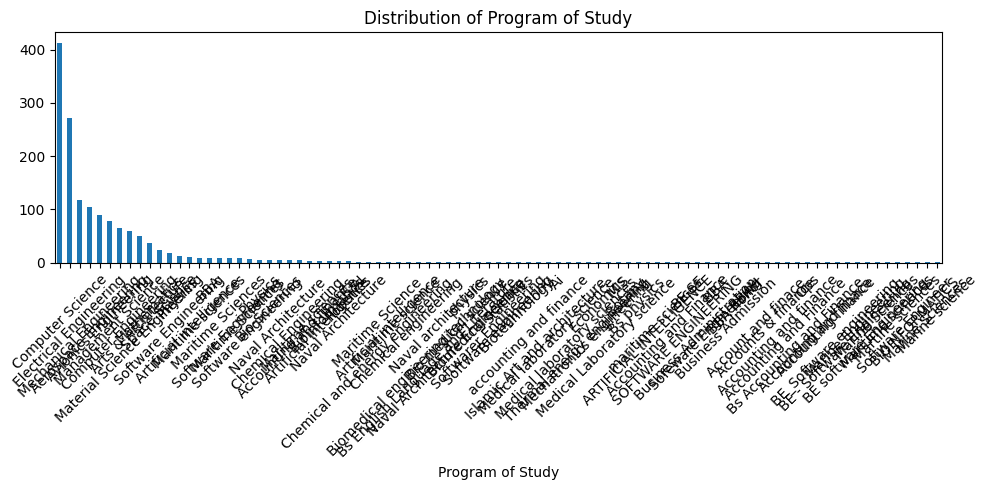


Value counts for Gender:
Gender
Male      999
Female    508
Name: count, dtype: int64


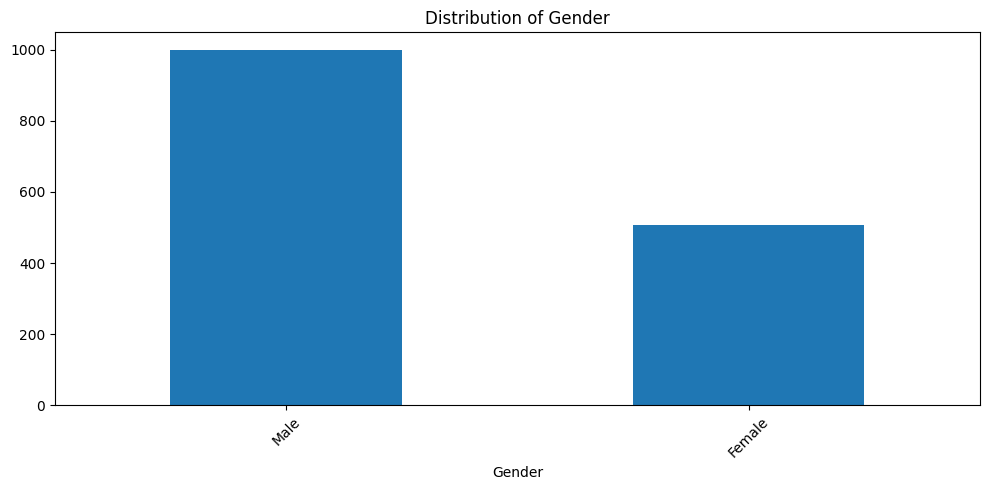


Value counts for Nationality:
Nationality
Pakistani    1487
Dual           14
Other           6
Name: count, dtype: int64


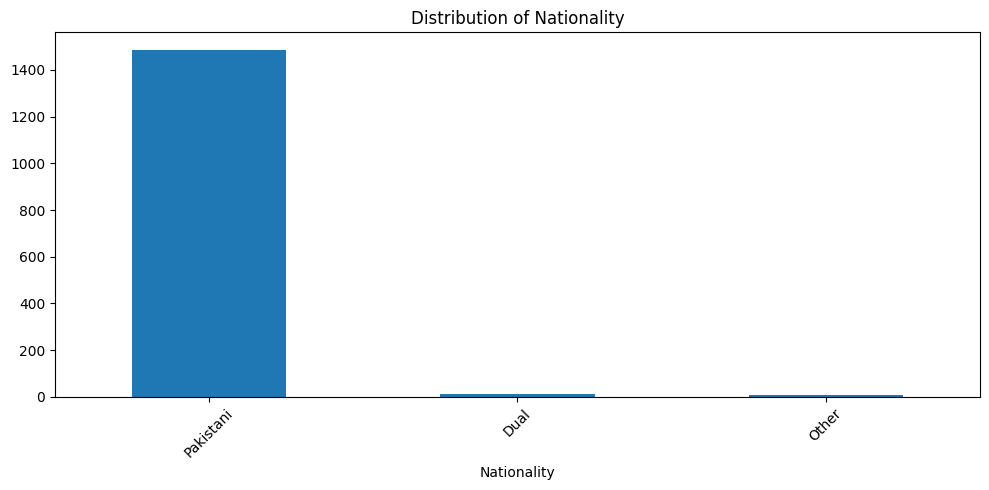


Value counts for Place of Birth:
Place of Birth
Punjab              791
Federal/ Capital    262
KPK                 207
Sindh               166
International        60
Balochistan          21
Name: count, dtype: int64


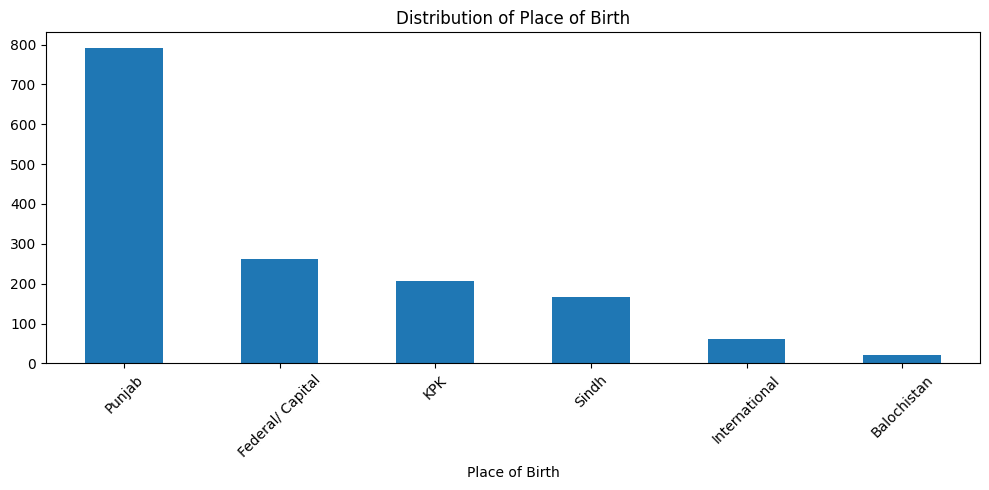


Value counts for My current semester is::
My current semester is:
6th             525
8th             337
4th             278
3rd             120
5th              86
7th              61
BS               36
MS               31
Intermediate     19
Matric           12
PhD/ Doctor       1
Below Matric      1
Name: count, dtype: int64


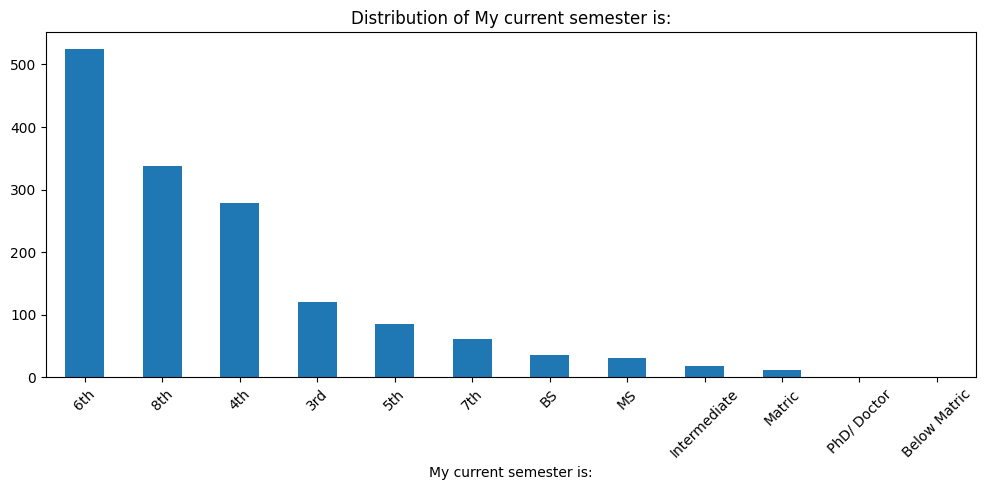


Value counts for Father's Education:
Father's Education
BS              484
MS              352
Intermediate    321
Matric          194
Below Matric    103
PhD/ Doctor      53
Name: count, dtype: int64


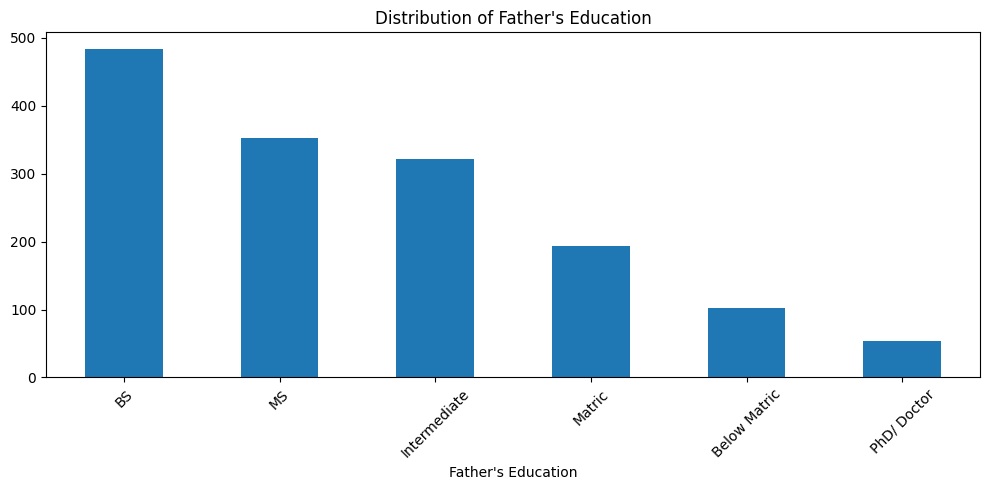


Value counts for Mother's Education:
Mother's Education
BS                   398
Intermediate         283
Below Matric         258
MS                   247
Matric               206
Between 50K~1Lac      33
Between 1Lac~2Lac     32
PhD/ Doctor           15
Above 3Lac            13
Between 2Lac~3Lac      9
Below 30K              7
Between 30K~50K        6
Name: count, dtype: int64


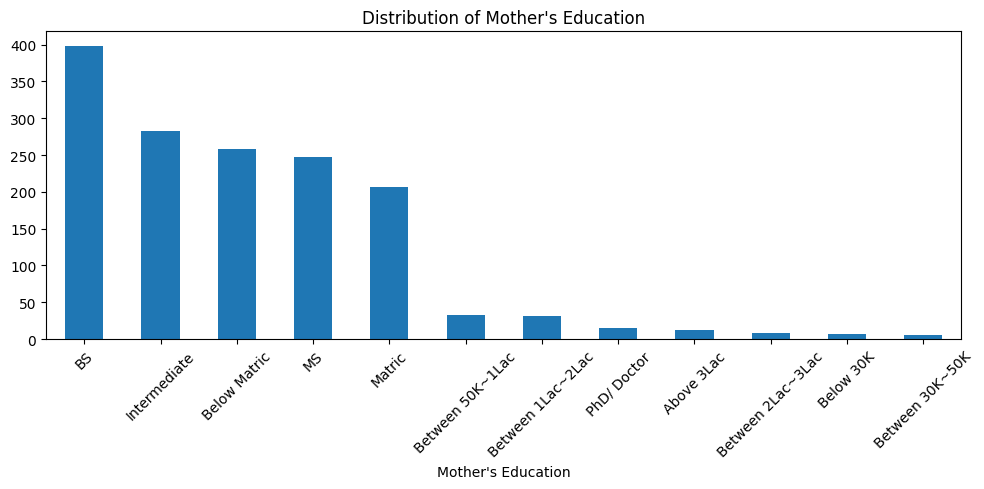


Value counts for Parental Income:
Parental Income
Between 50K~1Lac     470
Between 1Lac~2Lac    370
Between 2Lac~3Lac    174
Between 30K~50K      166
Above 3Lac           143
Below 30K             84
5                     35
6                     34
Above 6               13
4                     13
3                      3
2                      2
Name: count, dtype: int64


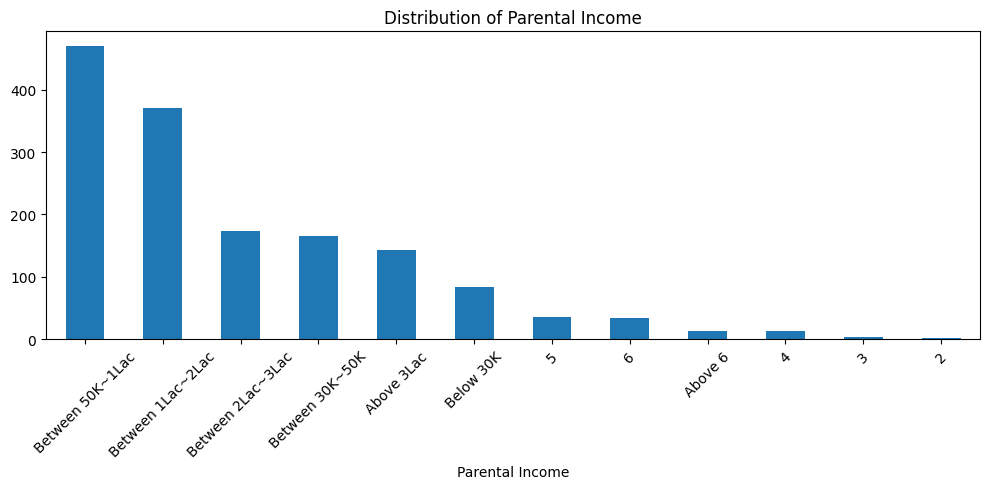


Value counts for Any close family member with the same profession available for guidance:
Any close family member with the same profession available for guidance
NO                  1057
YES                  450
Grading Criteria       1
Grade Points           1
3.50-4.00              1
3.00-3.49              1
2.50-2.99              1
2.00-2.49              1
0.00-1.99              1
Name: count, dtype: int64


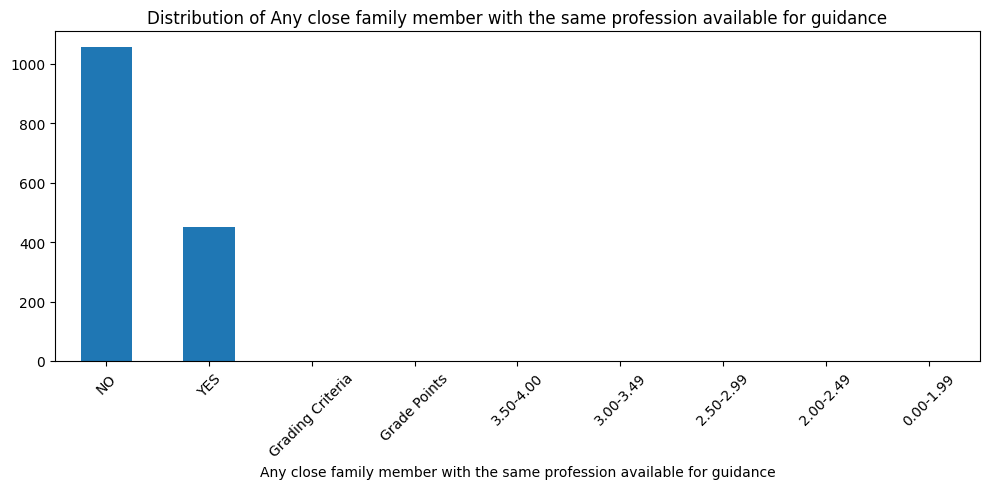


Value counts for Availing any scholarship:
Availing any scholarship
NO        1221
YES        286
Grade        1
A            1
B            1
C            1
D            1
E            1
Name: count, dtype: int64


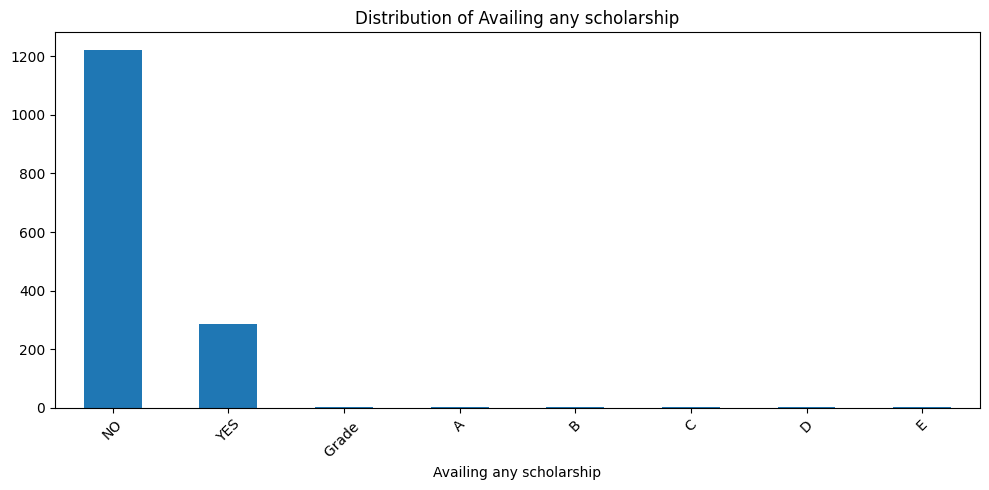


Value counts for Basic Education Stream:
Basic Education Stream
Matric       1389
Cambridge     118
Name: count, dtype: int64


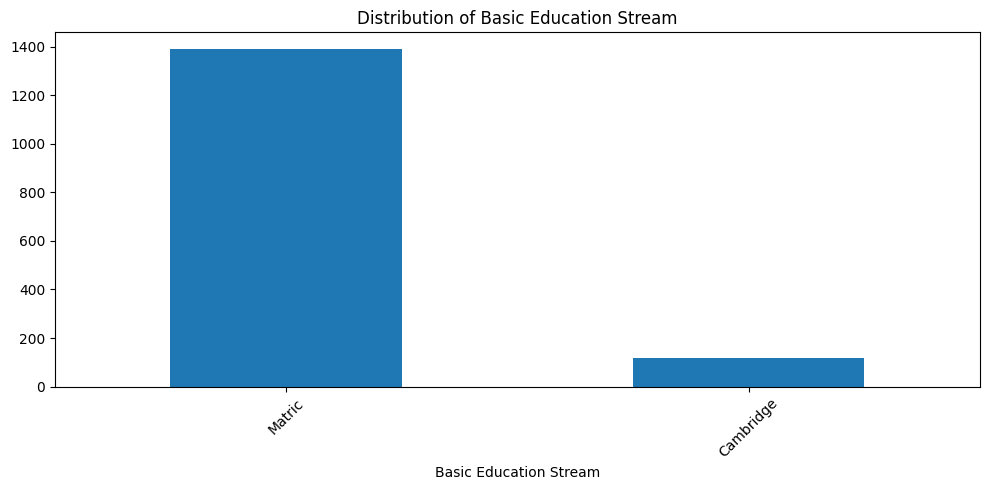


Value counts for Intermediate Stream:
Intermediate Stream
FSc/ ICS    1414
A-Level       93
Name: count, dtype: int64


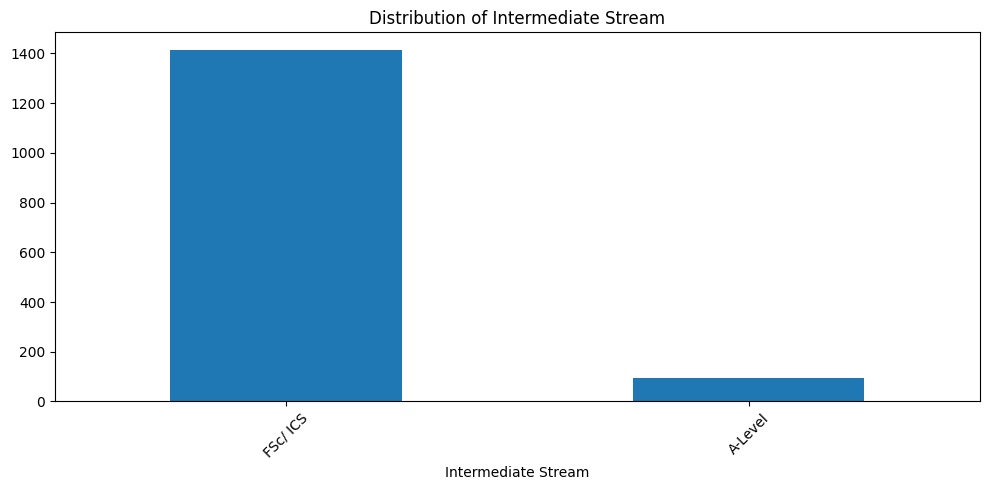


Value counts for Matric Percentage :
Matric Percentage 
80                 73
90                 64
86                 62
89                 50
87                 47
                   ..
83.81               1
81.36               1
78.09               1
70.63               1
Online lectures     1
Name: count, Length: 442, dtype: int64


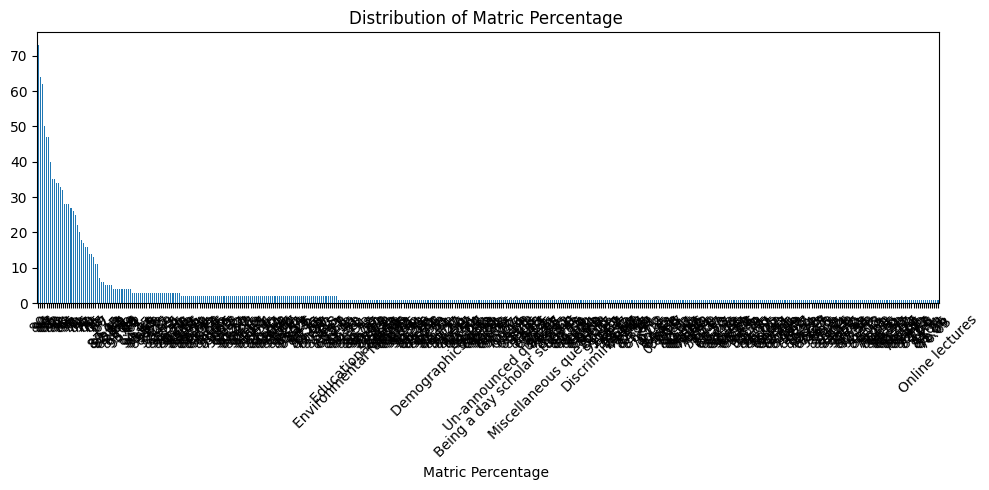


Value counts for SGPA in BS Second semester :
SGPA in BS Second semester 
3        43
2.7      42
2.8      42
3.2      41
3.3      38
         ..
1.89      1
3.73      1
1.332     1
2.09      1
1.94      1
Name: count, Length: 224, dtype: int64


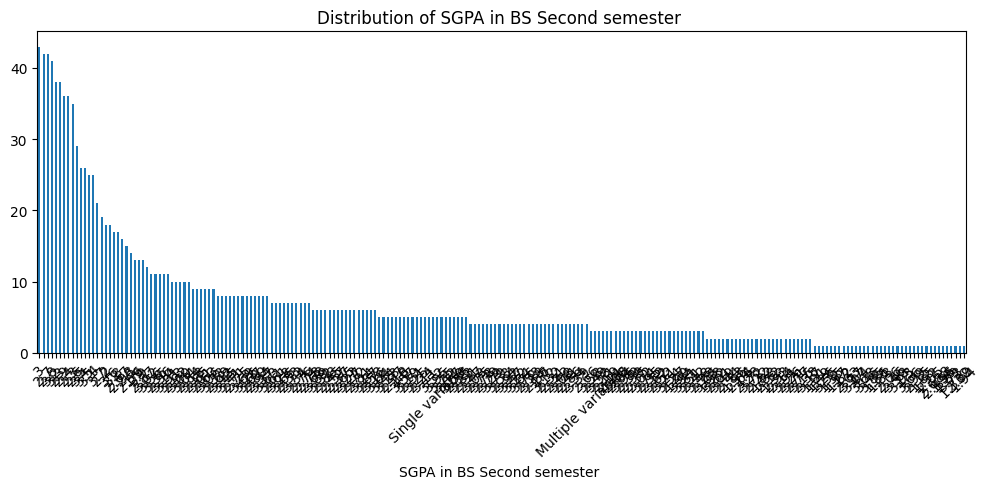


Value counts for PredictedSGPA of BS Third semester :
PredictedSGPA of BS Third semester 
2.5                    47
3                      46
2.4                    45
2.8                    39
2.6                    38
                       ..
2.68                    1
0.5                     1
3.82                    1
3.48                    1
Predicted Variables     1
Name: count, Length: 234, dtype: int64


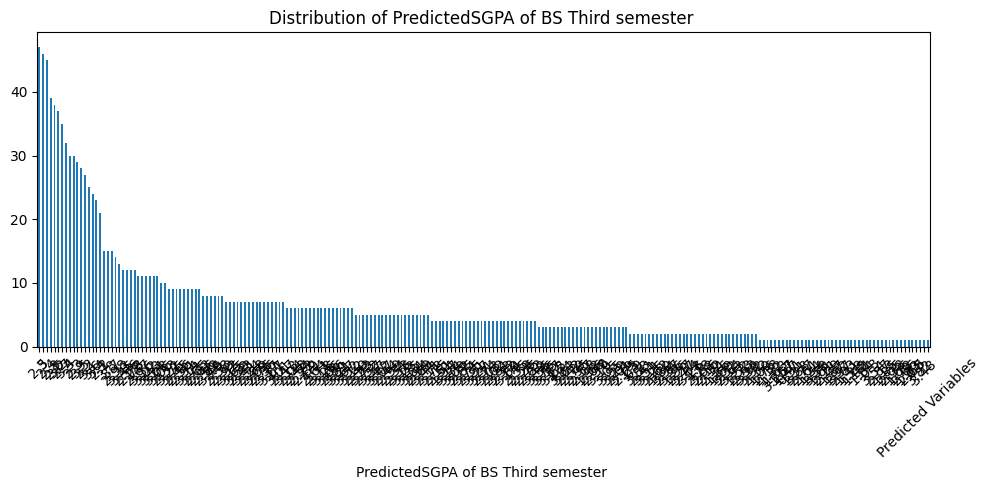


Value counts for Predicted Grade (based on SGPA) of 3rd semester:
Predicted Grade (based on SGPA) of 3rd semester
C    426
B    418
D    300
A    280
E     83
Name: count, dtype: int64


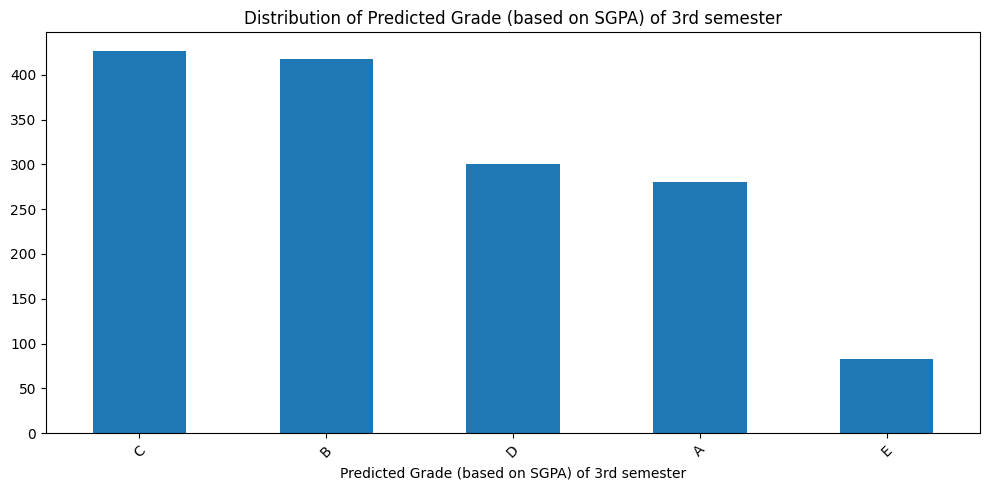


Value counts for Predicted Grade (based on CGPA) of 3rd semester:
Predicted Grade (based on CGPA) of 3rd semester
C    523
B    445
D    274
A    227
E     38
Name: count, dtype: int64


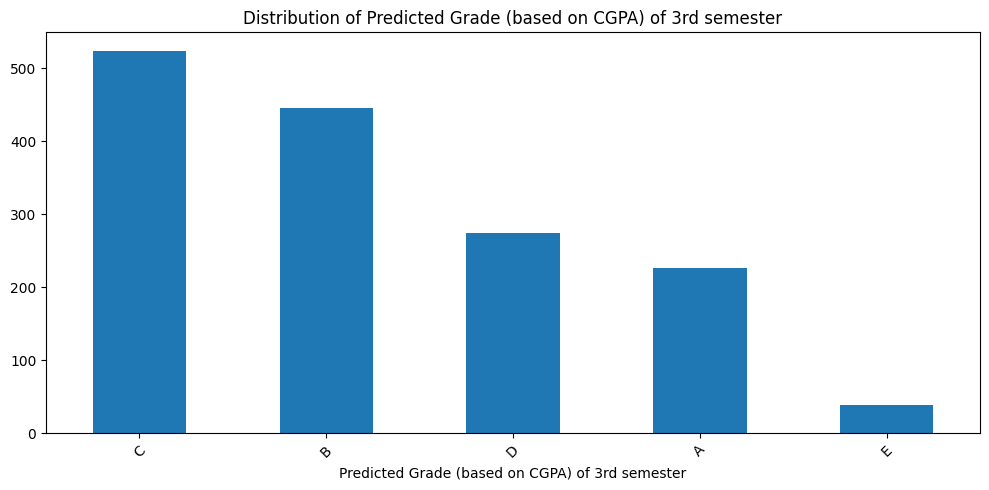


Value counts for I understand the lecture more clearly if delivered in::
I understand the lecture more clearly if delivered in:
Mix of both English and Urdu               835
Language does not effect my performance    433
Urdu                                       188
English                                     51
Name: count, dtype: int64


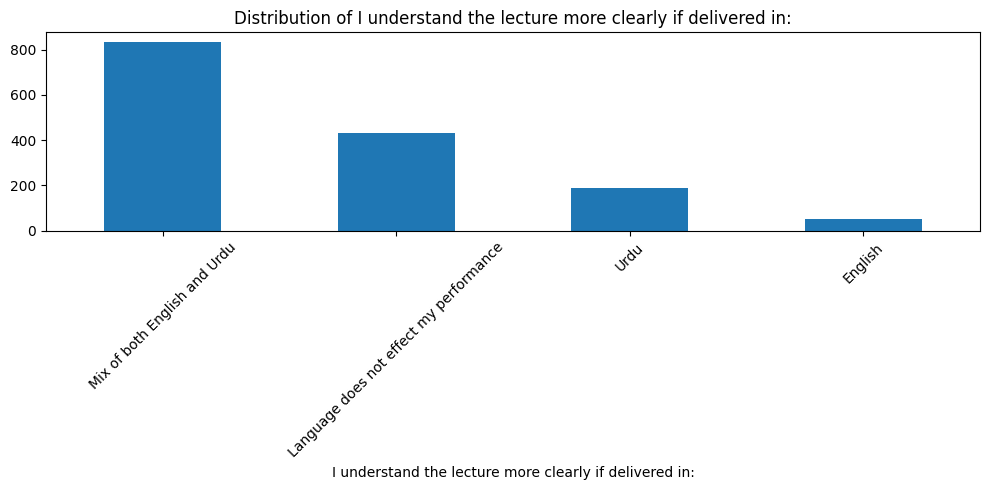


Value counts for I understand the lecture more clearly if delivered on::
I understand the lecture more clearly if delivered on:
Mix of both whiteboard and power point                     960
Whiteboard                                                 276
Mode of lecture delivery does not effect my performance    174
Power point                                                 97
Name: count, dtype: int64


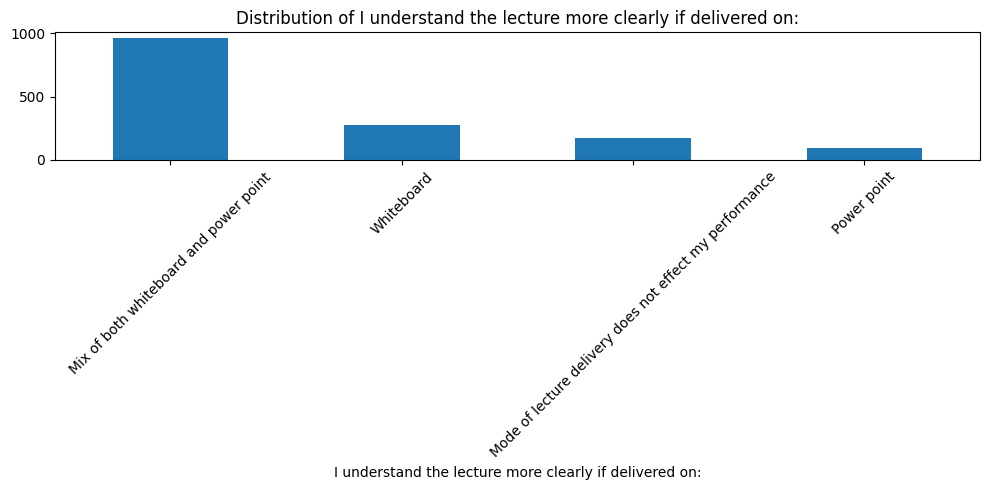


Value counts for I understand the lecture more clearly if my sitting place is in::
I understand the lecture more clearly if my sitting place is in:
First row                                       513
Sitting place does not effect my performance    511
Middle row                                      413
Last row                                         70
Strongly agree                                    1
Agree                                             1
Neutral                                           1
Disagree                                          1
Strongly disagree                                 1
Day scholar                                       1
Hostelite                                         1
Name: count, dtype: int64


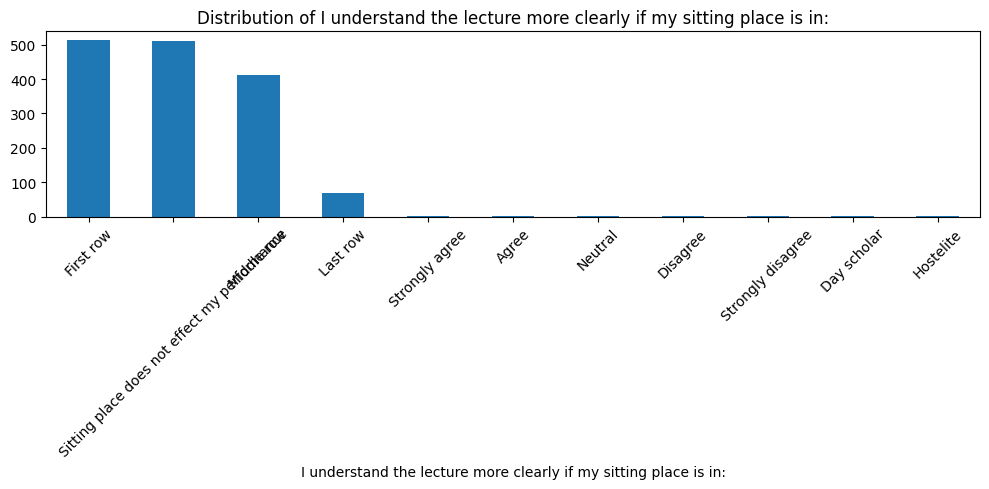


Value counts for I understand the lecture more clearly if the duration is::
I understand the lecture more clearly if the duration is:
1 hour                                                1304
Duration of lecture does not effect my performance     134
1.5 hour                                                69
Name: count, dtype: int64


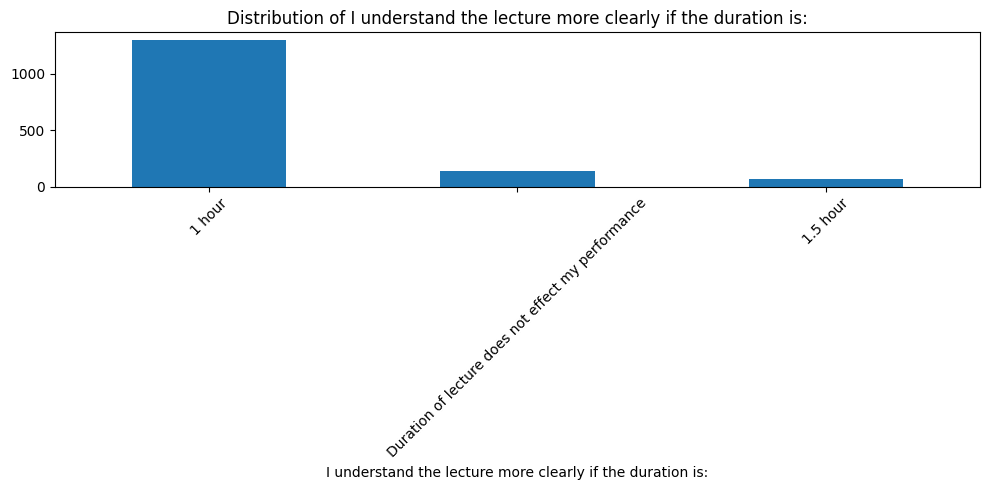


Value counts for I understand the lecture more clearly if delivered by::
I understand the lecture more clearly if delivered by:
Instructor gender does not effect my performance    1239
Male instructor                                      194
Female instructor                                     72
Name: count, dtype: int64


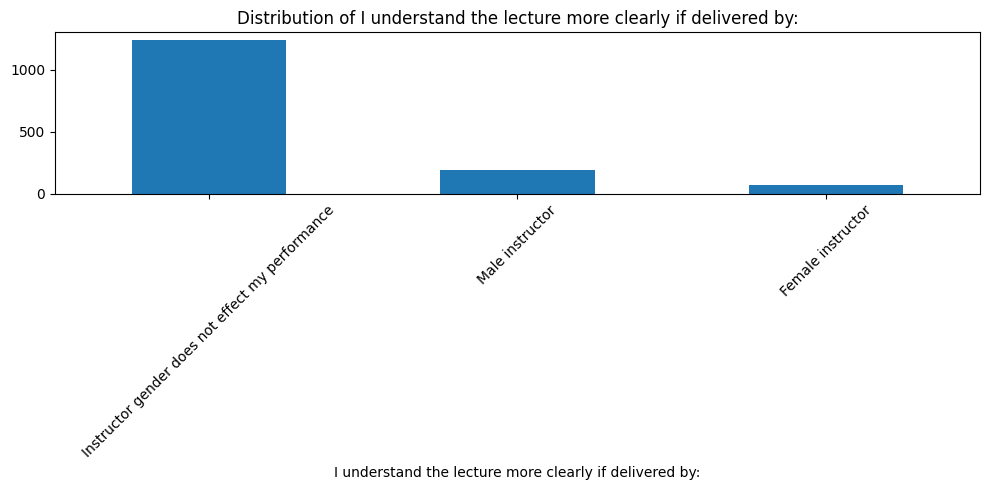


Value counts for I understand the lecture more clearly if the number of students in classroom are::
I understand the lecture more clearly if the number of students in classroom are:
Not more than 30                                     726
Number of students does not effect my performance    578
Not more than 40                                     158
Not more than 50                                      45
Name: count, dtype: int64


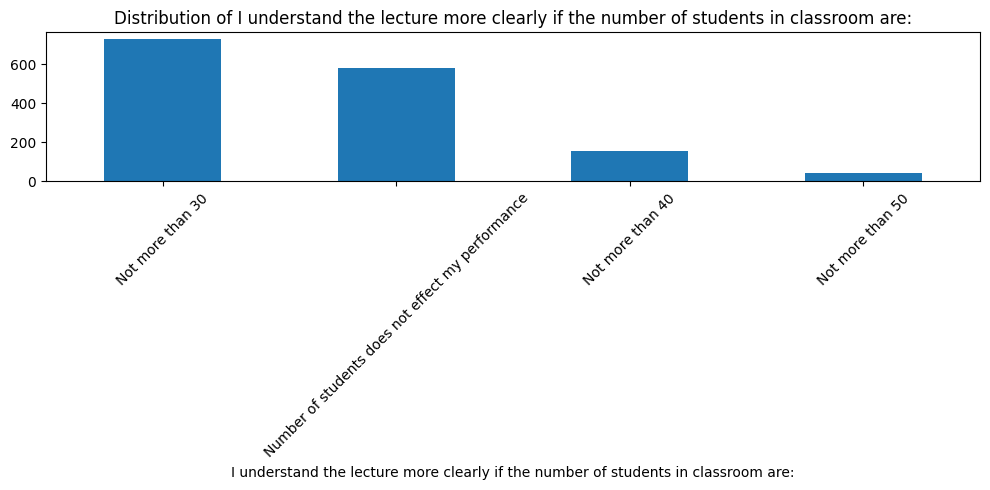


Value counts for I understand the lecture more clearly if::
I understand the lecture more clearly if:
I take notes during lecture                                  1026
Only understand the concepts without noting them down         275
Notes taking has no relation with my academic performance     206
2                                                               2
1                                                               2
5                                                               1
4                                                               1
3                                                               1
Name: count, dtype: int64


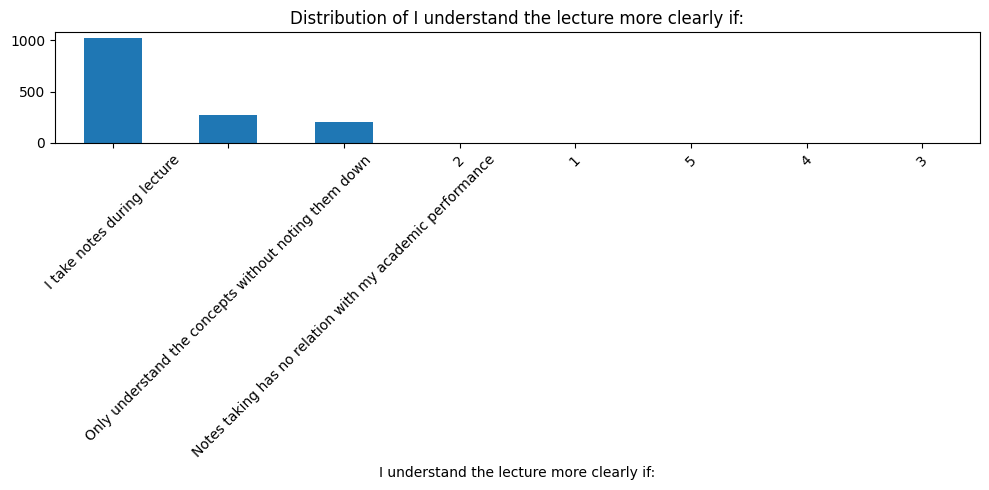


Value counts for My preferable mode of study is::
My preferable mode of study is:
Independent study    958
Group study          549
Name: count, dtype: int64


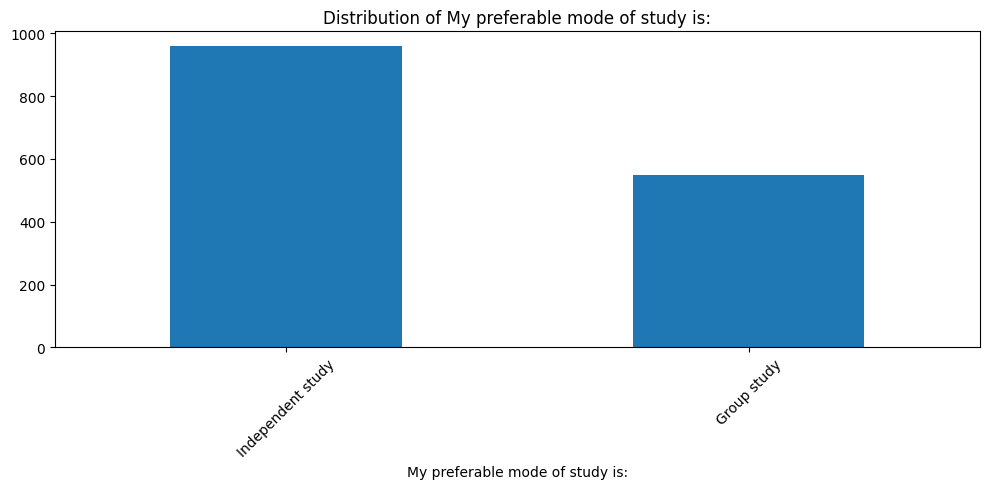


Value counts for My preferable time of study is::
My preferable time of study is:
Late night    913
Day time      594
Name: count, dtype: int64


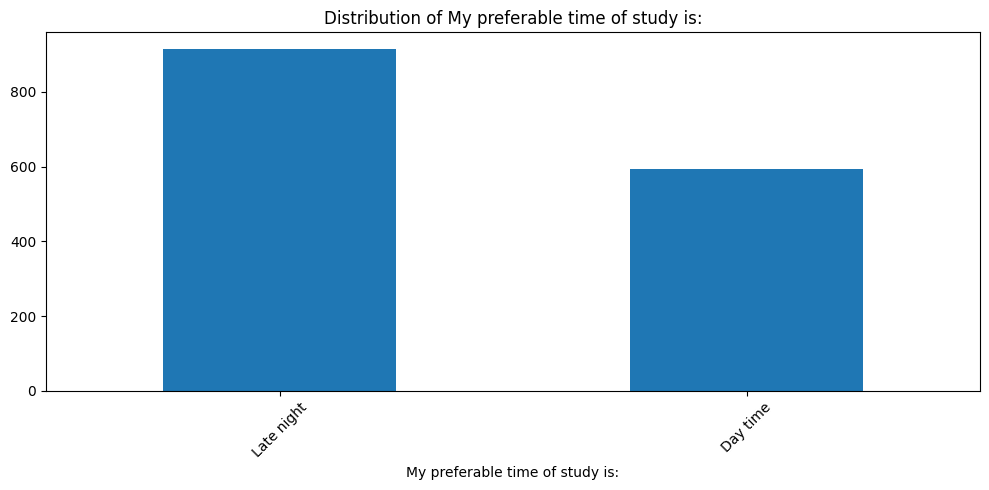


Value counts for My overall mobile usage (daily) for non-academic purpose is limited to::
My overall mobile usage (daily) for non-academic purpose is limited to:
3~4 hours            666
1~2 hours            367
5~6 hours            304
7~8 hours             87
More than 8 hours     83
Name: count, dtype: int64


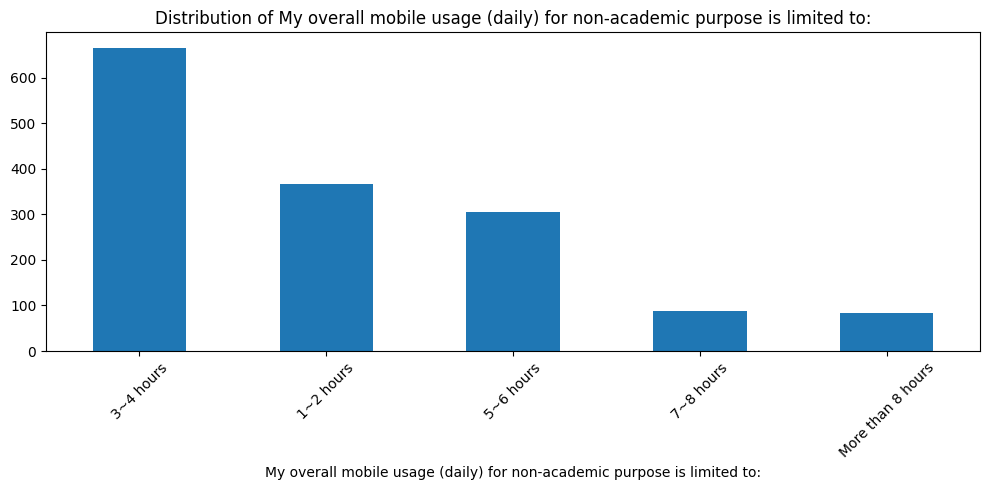

In [34]:
analyze_categorical_features(df, categorical_columns)

In [35]:
df = handle_missing_values(df, numeric_columns, categorical_columns)

In [36]:
df


Program of Study  Gender Nationality Place of Birth  \
ID                                                         
1.0  Computer Science    Male   Pakistani         Punjab   
2.0  Computer Science    Male   Pakistani         Punjab   
3.0  Computer Science  Female   Pakistani            KPK   
4.0  Computer Science    Male   Pakistani         Punjab   
5.0  Computer Science  Female   Pakistani         Punjab   
..                ...     ...         ...            ...   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   

    My current semester is: Father's Education Mother's Education  \
ID                                                                  
1.0                     6th       Intermediate       Intermediate   
2.0                     8th             Matric       Below Matric   
3.0                     8th       Intermediate             Matric   
4.0                     6th             Matric       Below Matric   
5.0                     8th             Matric                 BS   
..                      ...                ...                ...   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   

      Parental Income  \
ID                      
1.0         Below 30K   
2.0  Between 50K~1Lac   
3.0  Between 50K~1Lac   
4.0         Below 30K   
5.0   Between 30K~50K   
..                ...   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   

    Any close family member with the same profession available for guidance  \
ID                                                                            
1.0                                                 NO                        
2.0                                                 NO                        
3.0                                                YES                        
4.0                                                 NO                        
5.0                                                 NO                        
..                                                 ...                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        

    Availing any scholarship  ...  \
ID                            ...   
1.0                       NO  ...   
2.0                       NO  ...   
3.0                      YES  ...   
4.0                      YES  ...   
5.0                      YES  ...   
..                       ...  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   

     I prefer to revise the lectures daily or before the next class of the same subject.  \
ID                                                                                         
1.0                                                3.0                                     
2.0                                                1.0                                     
3.0                                                3.0                                     
4.0                           

In [37]:
df = handle_outliers(df, numeric_columns)

In [38]:
df

Program of Study  Gender Nationality Place of Birth  \
ID                                                         
1.0  Computer Science    Male   Pakistani         Punjab   
2.0  Computer Science    Male   Pakistani         Punjab   
3.0  Computer Science  Female   Pakistani            KPK   
4.0  Computer Science    Male   Pakistani         Punjab   
5.0  Computer Science  Female   Pakistani         Punjab   
..                ...     ...         ...            ...   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   
NaN  Computer Science    Male   Pakistani         Punjab   

    My current semester is: Father's Education Mother's Education  \
ID                                                                  
1.0                     6th       Intermediate       Intermediate   
2.0                     8th             Matric       Below Matric   
3.0                     8th       Intermediate             Matric   
4.0                     6th             Matric       Below Matric   
5.0                     8th             Matric                 BS   
..                      ...                ...                ...   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   
NaN                     6th                 BS                 BS   

      Parental Income  \
ID                      
1.0         Below 30K   
2.0  Between 50K~1Lac   
3.0  Between 50K~1Lac   
4.0         Below 30K   
5.0   Between 30K~50K   
..                ...   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   
NaN  Between 50K~1Lac   

    Any close family member with the same profession available for guidance  \
ID                                                                            
1.0                                                 NO                        
2.0                                                 NO                        
3.0                                                YES                        
4.0                                                 NO                        
5.0                                                 NO                        
..                                                 ...                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        
NaN                                                 NO                        

    Availing any scholarship  ...  \
ID                            ...   
1.0                       NO  ...   
2.0                       NO  ...   
3.0                      YES  ...   
4.0                      YES  ...   
5.0                      YES  ...   
..                       ...  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   
NaN                       NO  ...   

     I prefer to revise the lectures daily or before the next class of the same subject.  \
ID                                                                                         
1.0                                                3.0                                     
2.0                                                1.0                                     
3.0                                                3.0                                     
4.0                           

In [39]:
df.columns

Index(['Program of Study', 'Gender', 'Nationality', 'Place of Birth',
       'My current semester is:', 'Father's Education', 'Mother's Education',
       'Parental Income',
       'Any close family member with the same profession available for guidance',
       'Availing any scholarship',
       'I opted for this program of study because of my own interest.',
       'Basic Education Stream', 'Intermediate Stream', 'Matric Percentage ',
       'Intermediate Percentage ', 'SGPA in BS First semester ',
       'SGPA in BS Second semester ', 'PredictedSGPA of BS Third semester ',
       'Predicted Grade (based on SGPA) of 3rd semester',
       'PredictedCGPA of BS third sem.',
       'Predicted Grade (based on CGPA) of 3rd semester',
       'I understand the lecture more clearly if delivered in:',
       'I understand the lecture more clearly if delivered on:',
       'I understand the lecture more clearly if my sitting place is in:',
       'I understand the lecture more clearly if the du

# <strong>Feature Exploration</strong>

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [41]:
def perform_anova_analysis(df, numeric_columns, target_column):
    """
    Perform one-way ANOVA test for numeric features across grade categories
    """
    print("\n1. ANOVA Analysis Results:")
    print("-" * 50)

    anova_results = {}
    for feature in numeric_columns:
        # Create groups based on grades
        groups = [group[feature].values for name, group in df.groupby(target_column)]

        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)

        anova_results[feature] = {"F-statistic": f_statistic, "p-value": p_value}

    # Convert results to DataFrame and sort by p-value
    anova_df = pd.DataFrame(anova_results).T
    anova_df = anova_df.sort_values("p-value")

    print("\nANOVA test results:")
    print(anova_df)

    # Visualize ANOVA results
    plt.figure(figsize=(12, 6))
    plt.bar(anova_df.index, -np.log10(anova_df["p-value"]))
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("-log10(p-value)")
    plt.title("ANOVA Significance by Feature")
    plt.tight_layout()
    plt.show()

    return anova_df

In [42]:
def correlation_analysis(df, numeric_columns, target_column):
    """
    Perform correlation analysis between features and target variable
    """
    print("\n2. Correlation Analysis:")
    print("-" * 50)

    # Calculate correlations
    correlations = {}
    for feature in numeric_columns:
        correlation = df[feature].corr(df[target_column])
        correlations[feature] = correlation

    # Convert to DataFrame and sort
    corr_df = pd.DataFrame.from_dict(
        correlations, orient="index", columns=["Correlation"]
    )
    corr_df = corr_df.sort_values("Correlation", ascending=False)

    print("\nCorrelations with target variable:")
    print(corr_df)

    # Visualization of correlations
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        df[numeric_columns + [target_column]].corr(),
        annot=True,
        cmap="coolwarm",
        center=0,
    )
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    return corr_df

In [43]:
def chi_square_analysis(df, categorical_columns, target_column):
    """
    Perform chi-square tests for categorical features
    """
    print("\n3. Chi-square Test Results:")
    print("-" * 50)

    chi_square_results = {}
    for feature in categorical_columns:
        # Create contingency table
        contingency_table = pd.crosstab(df[feature], df[target_column])

        # Perform chi-square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        chi_square_results[feature] = {
            "chi2_stat": chi2_stat,
            "p_value": p_value,
            "dof": dof,
        }

    # Convert results to DataFrame and sort by chi-square statistic
    chi_square_df = pd.DataFrame(chi_square_results).T
    chi_square_df = chi_square_df.sort_values("chi2_stat", ascending=False)

    print("\nChi-square test results:")
    print(chi_square_df)

    # Visualize chi-square results
    plt.figure(figsize=(12, 6))
    plt.bar(chi_square_df.index, -np.log10(chi_square_df["p_value"]))
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("-log10(p-value)")
    plt.title("Chi-square Test Significance by Feature")
    plt.tight_layout()
    plt.show()

    return chi_square_df

In [44]:
def additional_feature_selection(
    df, numeric_columns, categorical_columns, target_column
):
    """
    Perform additional feature selection techniques
    """
    print("\n4. Additional Feature Selection Techniques:")
    print("-" * 50)

    # Prepare data
    le = LabelEncoder()
    df_encoded = df.copy()

    # Encode categorical variables
    for col in categorical_columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    # Encode target variable if it's categorical
    if df_encoded[target_column].dtype == "object":
        df_encoded[target_column] = le.fit_transform(df_encoded[target_column])

    # Combine features
    feature_columns = numeric_columns + categorical_columns
    X = df_encoded[feature_columns]
    y = df_encoded[target_column]

    # 1. Mutual Information
    mi_scores = mutual_info_classif(X, y)
    mi_results = pd.DataFrame({"Feature": feature_columns, "MI_Score": mi_scores})
    mi_results = mi_results.sort_values("MI_Score", ascending=False)

    print("\nMutual Information Scores:")
    print(mi_results)

    # 2. Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importance = pd.DataFrame(
        {"Feature": feature_columns, "Importance": rf.feature_importances_}
    )
    rf_importance = rf_importance.sort_values("Importance", ascending=False)

    print("\nRandom Forest Feature Importance:")
    print(rf_importance)

    # Visualize feature importance
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Mutual Information plot
    sns.barplot(x="MI_Score", y="Feature", data=mi_results, ax=ax1)
    ax1.set_title("Mutual Information Scores")

    # Random Forest Importance plot
    sns.barplot(x="Importance", y="Feature", data=rf_importance, ax=ax2)
    ax2.set_title("Random Forest Feature Importance")

    plt.tight_layout()
    plt.show()

    return mi_results, rf_importance


1. ANOVA Analysis Results:
--------------------------------------------------

ANOVA test results:
                                                    F-statistic   p-value
SGPA in BS First semester                             24.028865  0.000000
I am usually well prepared for exams but unable...     1.370318  0.000729
Intermediate Percentage                                1.288464  0.005428
I prefer to revise the lectures daily or before...     1.273483  0.007599
Lecture attendance has a positive effect on my ...     1.238722  0.015950
I usually do not perform very well in surprise ...     1.212627  0.026807
It is difficult to convey complex concepts in o...     1.202285  0.032631
Hostelites have better access to campus resourc...     1.181849  0.047372
It is easier for students to cheat in online ex...     1.181825  0.047392
I often come across health issues that effect m...     1.177791  0.050884
I am not usually prepared for surprise quizzes ...     1.169654  0.058580
I opted for 

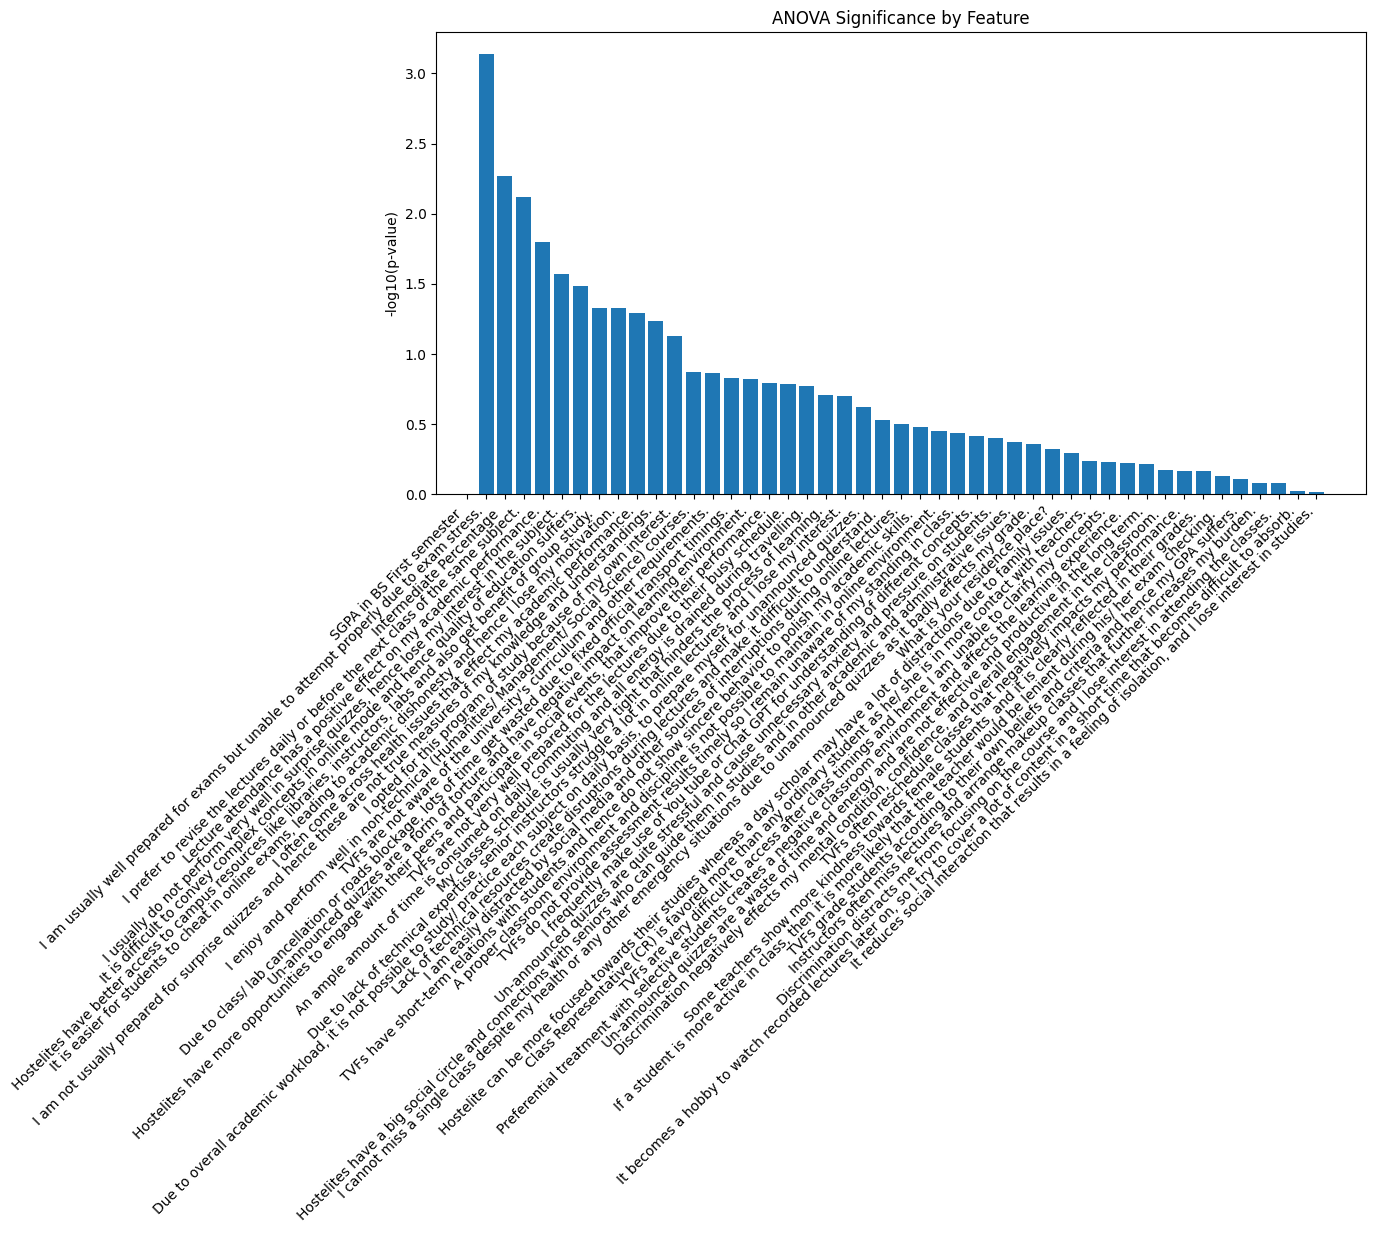


2. Correlation Analysis:
--------------------------------------------------

Correlations with target variable:
                                                    Correlation
SGPA in BS First semester                              0.863487
Intermediate Percentage                                0.212499
I opted for this program of study because of my...     0.153629
It is easier for students to cheat in online ex...     0.110576
Lecture attendance has a positive effect on my ...     0.104445
It is difficult to convey complex concepts in o...     0.079928
Due to lack of technical expertise, senior inst...     0.076470
Lack of technical resources create disruptions ...     0.062974
A proper classroom environment and discipline i...     0.044239
I frequently make use of You tube or Chat GPT f...     0.020825
I am easily distracted by social media and othe...     0.014607
Hostelite can be more focused towards their stu...     0.012225
Due to overall academic workload, it is not pos...     

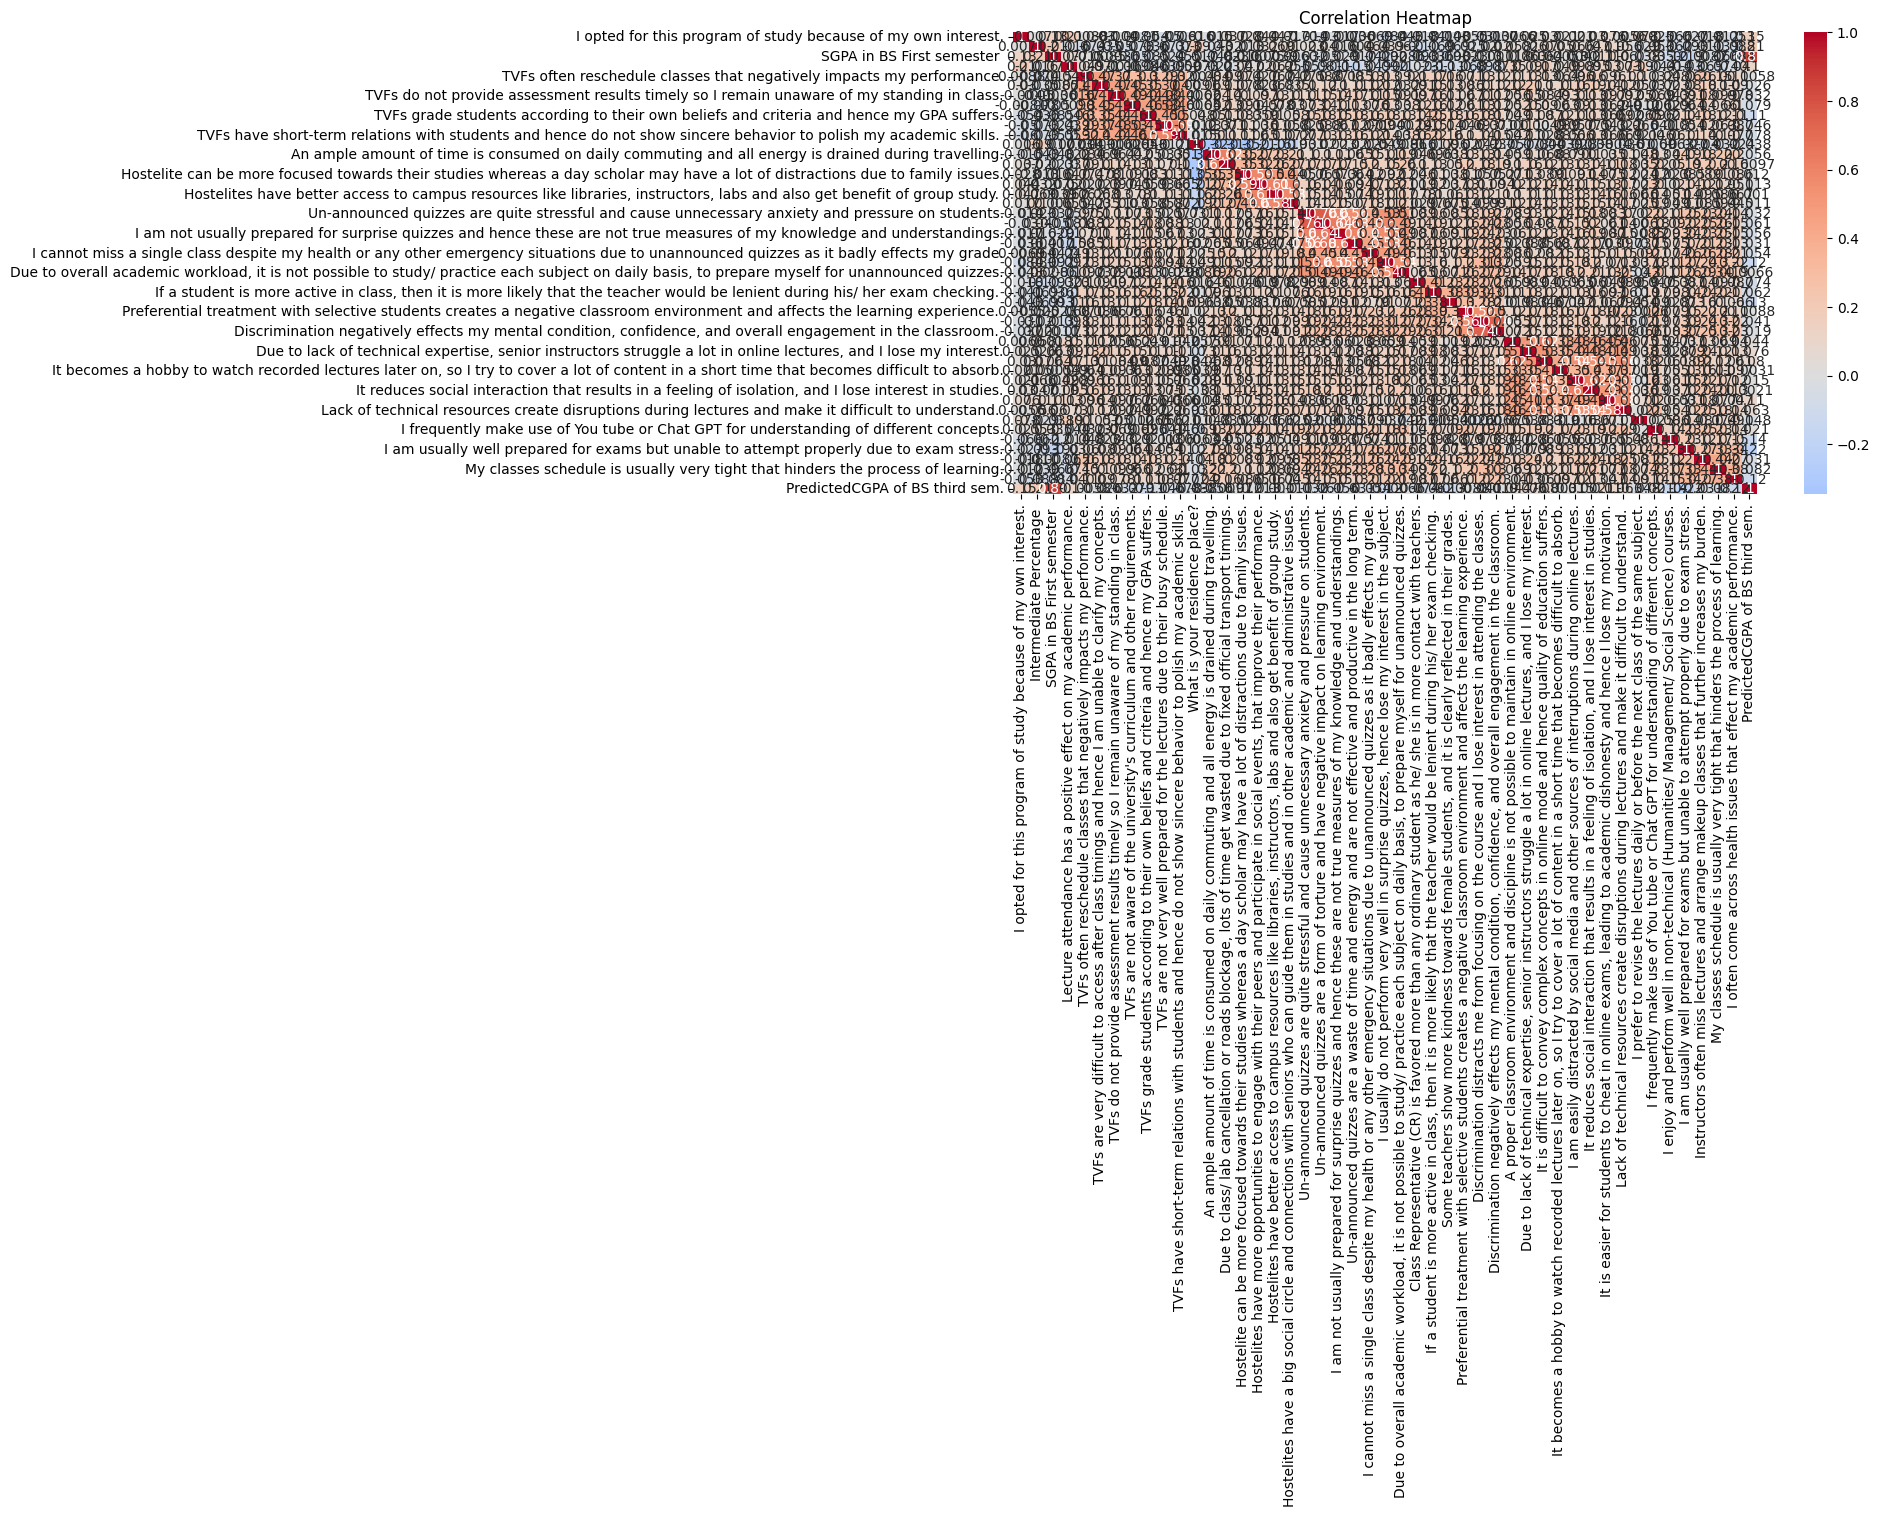


3. Chi-square Test Results:
--------------------------------------------------

Chi-square test results:
                                                      chi2_stat  \
SGPA in BS Second semester                          3254.045295   
PredictedSGPA of BS Third semester                  3137.225976   
Predicted Grade (based on SGPA) of 3rd semester     2002.863592   
Matric Percentage                                   1745.922385   
Program of Study                                     478.315325   
My current semester is:                               94.163732   
Place of Birth                                        71.473479   
Availing any scholarship                              57.999528   
Gender                                                54.961924   
Parental Income                                       46.785771   
Mother's Education                                    42.612020   
I understand the lecture more clearly if my sit...    41.581761   
I understand the lectur

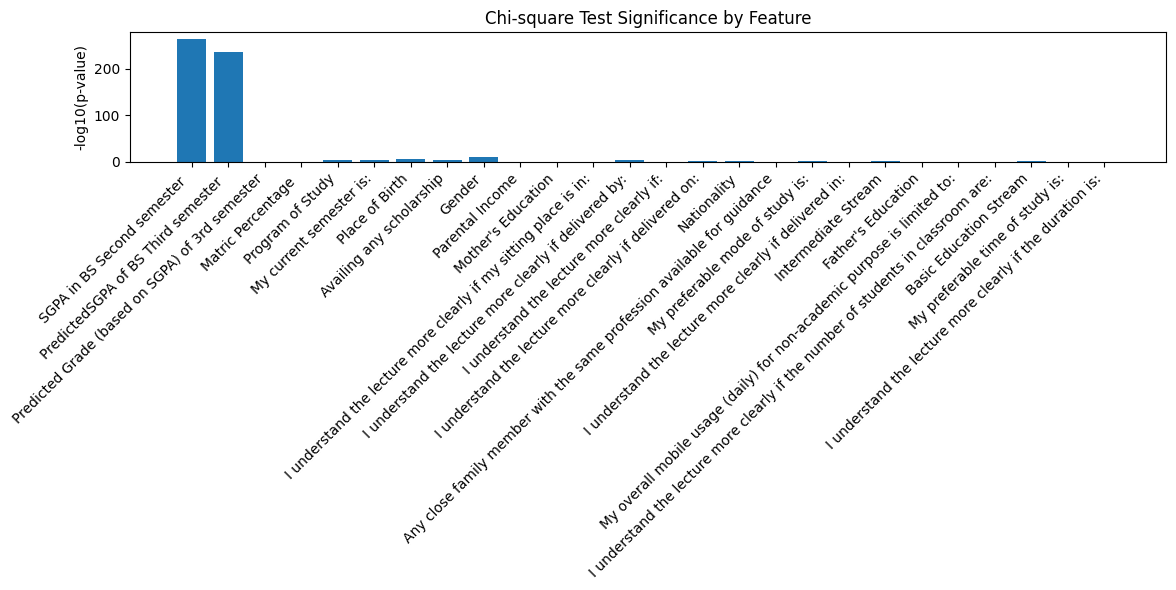

In [45]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Remove target columns from feature lists
classification_target_column = (
    "Predicted Grade (based on CGPA) of 3rd semester"  # Replace with your target column
)
reg_target_column = "PredictedCGPA of BS third sem."  # Replace with your target column


if reg_target_column in numeric_columns:
    numeric_columns.remove(reg_target_column)

if classification_target_column in categorical_columns:
    categorical_columns.remove(classification_target_column)

# Perform all analyses
anova_results = perform_anova_analysis(df, numeric_columns, reg_target_column)
correlation_results = correlation_analysis(df, numeric_columns, reg_target_column)
chi_square_results = chi_square_analysis(
    df, categorical_columns, classification_target_column
)


# <strong>Model Training</strong>

In [48]:
# Model Implementation for Classification and Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
class ModelImplementation:
    def __init__(self, df, classification_target, regression_target):
        self.df = df
        self.classification_target = classification_target
        self.regression_target = regression_target
        self.numeric_columns = df.select_dtypes(
            include=["int64", "float64"]
        ).columns.tolist()
        self.categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

        # Remove target columns from features
        for target in [classification_target, regression_target]:
            if target in self.numeric_columns:
                self.numeric_columns.remove(target)
            if target in self.categorical_columns:
                self.categorical_columns.remove(target)

    def preprocess_data(self):
        """Preprocess the data for modeling"""
        # Create copy of dataframe
        df_processed = self.df.copy()

        # Encode categorical variables
        self.le = LabelEncoder()
        for col in self.categorical_columns:
            df_processed[col] = self.le.fit_transform(df_processed[col])

        # Standardize numeric features
        self.scaler = StandardScaler()
        df_processed[self.numeric_columns] = self.scaler.fit_transform(
            df_processed[self.numeric_columns]
        )

        # Prepare features
        feature_columns = self.numeric_columns + self.categorical_columns
        X = df_processed[feature_columns]

        # Prepare targets
        y_class = self.le.fit_transform(df_processed[self.classification_target])
        y_reg = df_processed[self.regression_target]

        # Split data
        X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
            X, y_class, test_size=0.3, random_state=42
        )

        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            X, y_reg, test_size=0.3, random_state=42
        )

        return (
            X_train_class,
            X_test_class,
            y_train_class,
            y_test_class,
            X_train_reg,
            X_test_reg,
            y_train_reg,
            y_test_reg,
        )

    def train_classification_models(self, X_train, X_test, y_train, y_test):
        """Train and evaluate classification models"""
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "SVM": SVC(probability=True),
            "Neural Network": MLPClassifier(max_iter=1000),
        }

        results = {}
        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results[name] = {
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred, average="weighted"),
                "recall": recall_score(y_test, y_pred, average="weighted"),
                "f1": f1_score(y_test, y_pred, average="weighted"),
                "roc_auc": roc_auc_score(
                    y_test, model.predict_proba(X_test), multi_class="ovr"
                ),
            }

        return results

    def train_regression_models(self, X_train, X_test, y_train, y_test):
        """Train and evaluate regression models"""
        models = {
            "Linear Regression": LinearRegression(),
            "Decision Tree": DecisionTreeRegressor(),
            "Random Forest": RandomForestRegressor(),
            "SVR": SVR(),
            "GBM": GradientBoostingRegressor(),
            "KNN": KNeighborsRegressor(),
            "Neural Network": MLPRegressor(max_iter=5000),
        }

        results = {}
        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results[name] = {
                "mse": mean_squared_error(y_test, y_pred),
                "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                "mae": mean_absolute_error(y_test, y_pred),
                "r2": r2_score(y_test, y_pred),
            }

        return results

    def plot_classification_results(self, results):
        """Plot classification model results"""
        metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
        results_df = pd.DataFrame(results).T

        plt.figure(figsize=(15, 8))
        results_df[metrics].plot(kind="bar")
        plt.title("Classification Models Performance Comparison")
        plt.xlabel("Models")
        plt.ylabel("Score")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    def plot_regression_results(self, results):
        """Plot regression model results"""
        metrics = ["mse", "rmse", "mae", "r2"]
        results_df = pd.DataFrame(results).T

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()

        for idx, metric in enumerate(metrics):
            axes[idx].bar(results_df.index, results_df[metric])
            axes[idx].set_title(f"{metric.upper()} by Model")
            axes[idx].tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.show()

In [50]:
# Example usage
model_impl = ModelImplementation(
    df,
    "Predicted Grade (based on CGPA) of 3rd semester",
    "PredictedCGPA of BS third sem.",
)

# Preprocess data
(
    X_train_class,
    X_test_class,
    y_train_class,
    y_test_class,
    X_train_reg,
    X_test_reg,
    y_train_reg,
    y_test_reg,
) = model_impl.preprocess_data()


In [51]:
classification_target_column = (
    "Predicted Grade (based on CGPA) of 3rd semester"  # Replace with your target column
)
reg_target_column = "PredictedCGPA of BS third sem."  # Replace with your target column


Training Logistic Regression...

Training Decision Tree...

Training Random Forest...

Training SVM...

Training Neural Network...

Training Linear Regression...

Training Decision Tree...

Training Random Forest...

Training SVR...

Training GBM...

Training KNN...

Training Neural Network...


<Figure size 1500x800 with 0 Axes>

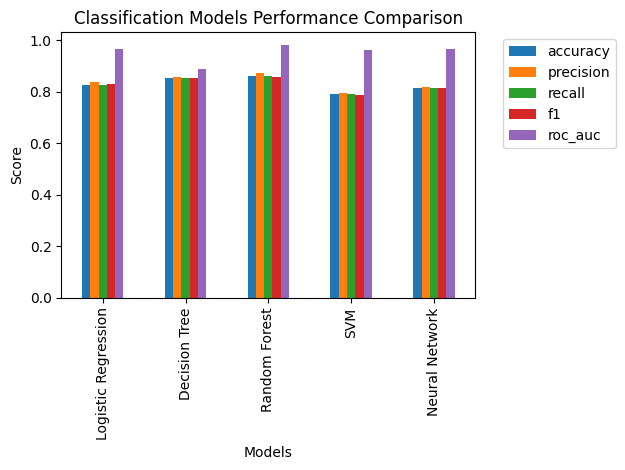

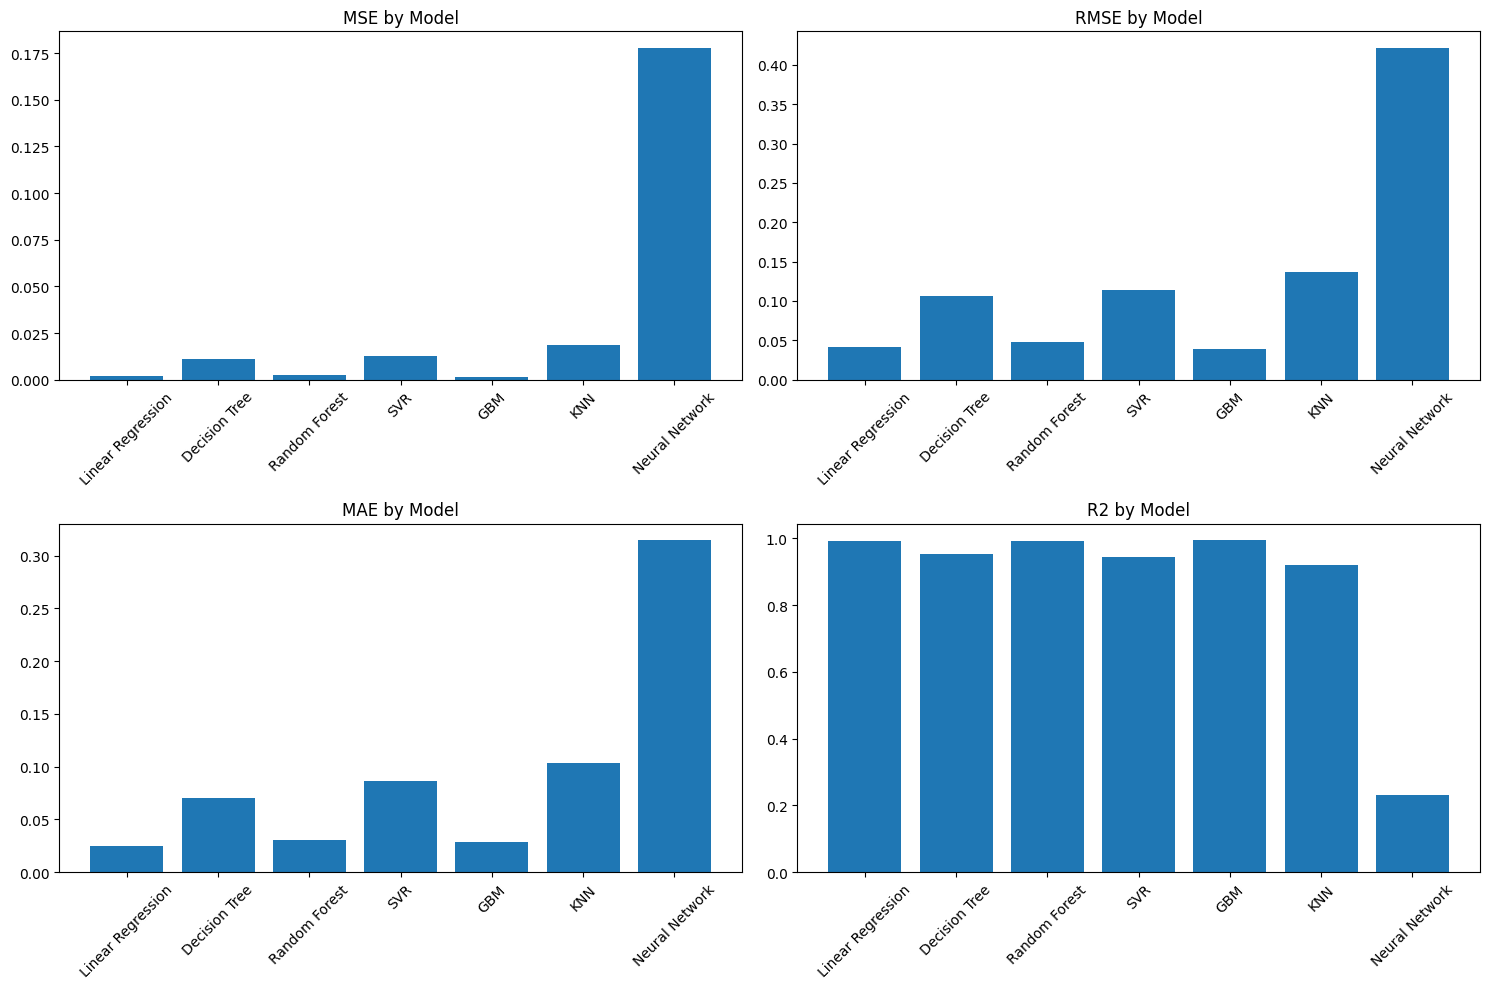


Classification Results:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.825328   0.838603  0.825328  0.829410  0.965167
Decision Tree        0.853712   0.856141  0.853712  0.854322  0.888197
Random Forest        0.860262   0.872754  0.860262  0.856124  0.981302
SVM                  0.792576   0.793110  0.792576  0.786909  0.963420
Neural Network       0.814410   0.817471  0.814410  0.815402  0.964057

Regression Results:
                        mse      rmse       mae        r2
Linear Regression  0.001775  0.042128  0.025176  0.992339
Decision Tree      0.011195  0.105807  0.070579  0.951676
Random Forest      0.002233  0.047259  0.030935  0.990359
SVR                0.012897  0.113567  0.086823  0.944328
GBM                0.001522  0.039008  0.028664  0.993432
KNN                0.018584  0.136325  0.103461  0.919780
Neural Network     0.177839  0.421710  0.314410  0.232352


In [52]:
# Train and evaluate classification models
classification_results = model_impl.train_classification_models(
    X_train_class, X_test_class, y_train_class, y_test_class
)

# Train and evaluate regression models
regression_results = model_impl.train_regression_models(
    X_train_reg, X_test_reg, y_train_reg, y_test_reg
)

# Plot results
model_impl.plot_classification_results(classification_results)
model_impl.plot_regression_results(regression_results)

# Print detailed results
print("\nClassification Results:")
print(pd.DataFrame(classification_results).T)

print("\nRegression Results:")
print(pd.DataFrame(regression_results).T)

In [53]:
# Model Optimization
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class ModelOptimization:
    def __init__(
        self,
        X_train_class,
        X_test_class,
        y_train_class,
        y_test_class,
        X_train_reg,
        X_test_reg,
        y_train_reg,
        y_test_reg,
    ):
        self.X_train_class = X_train_class
        self.X_test_class = X_test_class
        self.y_train_class = y_train_class
        self.y_test_class = y_test_class
        self.X_train_reg = X_train_reg
        self.X_test_reg = X_test_reg
        self.y_train_reg = y_train_reg
        self.y_test_reg = y_test_reg

        # Define parameter grids for each model
        self.classification_param_grids = {
            "Logistic Regression": {
                "model": LogisticRegression(max_iter=2000),
                "params": {
                    "C": [0.001, 0.01, 0.1, 1, 10],
                    "solver": ["lbfgs", "liblinear"],
                    "class_weight": [None, "balanced"],
                },
            },
            "Decision Tree": {
                "model": DecisionTreeClassifier(),
                "params": {
                    "max_depth": [3, 5, 7, 10],
                    "min_samples_split": [2, 5, 10],
                    "criterion": ["gini", "entropy"],
                },
            },
            "Random Forest": {
                "model": RandomForestClassifier(),
                "params": {
                    "n_estimators": [100, 200],
                    "max_depth": [5, 10],
                    "min_samples_split": [2, 5],
                    "class_weight": [None, "balanced"],
                },
            },
            "SVM": {
                "model": SVC(probability=True),
                "params": {
                    "C": [0.1, 1, 10],
                    "kernel": ["rbf", "linear"],
                    "gamma": ["scale", "auto"],
                },
            },
            "Neural Network": {
                "model": MLPClassifier(max_iter=2000),
                "params": {
                    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
                    "activation": ["relu", "tanh"],
                    "alpha": [0.0001, 0.001, 0.01],
                },
            },
        }

        self.regression_param_grids = {
            "Linear Regression": {
                "model": LinearRegression(),
                "params": {},  # Linear regression doesn't have hyperparameters to tune
            },
            "Decision Tree": {
                "model": DecisionTreeRegressor(),
                "params": {
                    "max_depth": [3, 5, 7, 10],
                    "min_samples_split": [2, 5, 10],
                    "criterion": ["squared_error", "absolute_error"],
                },
            },
            "Random Forest": {
                "model": RandomForestRegressor(),
                "params": {
                    "n_estimators": [100, 200],
                    "max_depth": [5, 10],
                    "min_samples_split": [2, 5],
                },
            },
            # "SVR": {
            #     "model": SVR(),
            #     "params": {
            #         "C": [0.1, 1, 10],
            #         "kernel": ["rbf", "linear"],
            #         "gamma": ["scale", "auto"],
            #     },
            # },
            "GBM": {
                "model": GradientBoostingRegressor(),
                "params": {
                    "n_estimators": [100, 200],
                    "learning_rate": [0.01, 0.1],
                    "max_depth": [3, 5],
                },
            },
            "KNN": {
                "model": KNeighborsRegressor(),
                "params": {
                    "n_neighbors": [3, 5, 7],
                    "weights": ["uniform", "distance"],
                    "p": [1, 2],
                },
            },
            "Neural Network": {
                "model": MLPRegressor(max_iter=2000),
                "params": {
                    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
                    "activation": ["relu", "tanh"],
                    "alpha": [0.0001, 0.001, 0.01],
                },
            },
        }

    def perform_cross_validation(self, model, X, y, cv=5, scoring=None):
        """Perform cross-validation and return scores"""
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        return {
            "mean_score": scores.mean(),
            "std_score": scores.std(),
            "all_scores": scores,
        }

    def optimize_classification_models(self):
        """Optimize classification models using GridSearchCV"""
        results = {}
        cv_results = {}

        for name, model_info in self.classification_param_grids.items():
            print(f"\nOptimizing {name}...")

            # Perform GridSearchCV
            grid_search = GridSearchCV(
                model_info["model"],
                model_info["params"],
                cv=5,
                scoring="f1_weighted",
                n_jobs=-1,
            )
            grid_search.fit(self.X_train_class, self.y_train_class)

            # Store results
            results[name] = {
                "best_params": grid_search.best_params_,
                "best_score": grid_search.best_score_,
                "best_model": grid_search.best_estimator_,
            }

            # Perform cross-validation with best model
            cv_results[name] = self.perform_cross_validation(
                grid_search.best_estimator_,
                self.X_train_class,
                self.y_train_class,
                scoring="f1_weighted",
            )

        return results, cv_results

    def optimize_regression_models(self):
        """Optimize regression models using GridSearchCV"""
        results = {}
        cv_results = {}

        for name, model_info in self.regression_param_grids.items():
            print(f"\nOptimizing {name}...")

            # Skip if no parameters to tune
            if not model_info["params"]:
                model = model_info["model"]
                model.fit(self.X_train_reg, self.y_train_reg)
                results[name] = {
                    "best_params": {},
                    "best_score": model.score(self.X_train_reg, self.y_train_reg),
                    "best_model": model,
                }
            else:
                # Perform GridSearchCV
                grid_search = GridSearchCV(
                    model_info["model"],
                    model_info["params"],
                    cv=2,
                    scoring="r2",
                    n_jobs=-1,
                )
                grid_search.fit(self.X_train_reg, self.y_train_reg)

                # Store results
                results[name] = {
                    "best_params": grid_search.best_params_,
                    "best_score": grid_search.best_score_,
                    "best_model": grid_search.best_estimator_,
                }

            # Perform cross-validation with best model
            cv_results[name] = self.perform_cross_validation(
                results[name]["best_model"],
                self.X_train_reg,
                self.y_train_reg,
                scoring="r2",
            )

        return results, cv_results

    def plot_cv_results(self, cv_results, title):
        """Plot cross-validation results"""
        plt.figure(figsize=(12, 6))

        data = []
        labels = []
        for model_name, results in cv_results.items():
            data.append(results["all_scores"])
            labels.extend([model_name] * len(results["all_scores"]))

        plt.boxplot(
            [results["all_scores"] for results in cv_results.values()],
            labels=cv_results.keys(),
        )
        plt.title(f"Cross-validation Scores - {title}")
        plt.xticks(rotation=45)
        plt.ylabel("Score")
        plt.tight_layout()
        plt.show()

    def print_optimization_results(self, results, model_type):
        """Print optimization results in a formatted way"""
        print(f"\n{model_type} Model Optimization Results:")
        print("-" * 50)

        for model_name, model_results in results.items():
            print(f"\n{model_name}:")
            print(f"Best Parameters: {model_results['best_params']}")
            print(f"Best Score: {model_results['best_score']:.4f}")


# Example usage
optimizer = ModelOptimization(
    X_train_class,
    X_test_class,
    y_train_class,
    y_test_class,
    X_train_reg,
    X_test_reg,
    y_train_reg,
    y_test_reg,
)




Optimizing Logistic Regression...


/home/aashir/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aashir/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi


Optimizing Decision Tree...

Optimizing Random Forest...

Optimizing SVM...

Optimizing Neural Network...

Classification Model Optimization Results:
--------------------------------------------------

Logistic Regression:
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Best Score: 0.8337

Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
Best Score: 0.8569

Random Forest:
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8453

SVM:
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8615

Neural Network:
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best Score: 0.8367


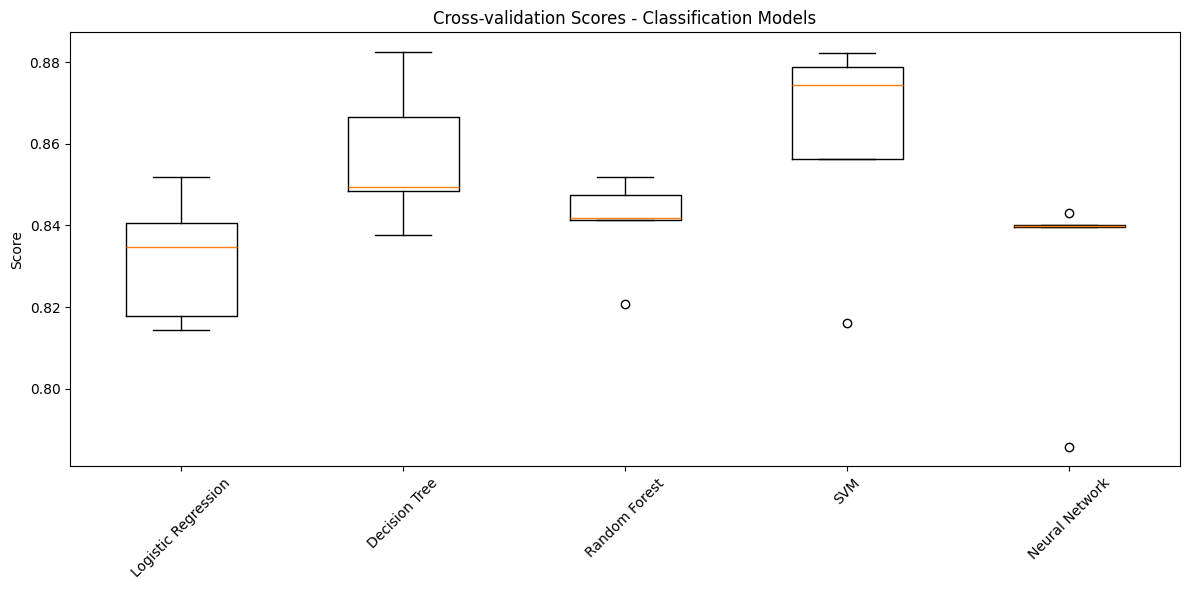

In [54]:
# Optimize classification models
class_results, class_cv_results = optimizer.optimize_classification_models()
optimizer.print_optimization_results(class_results, "Classification")
optimizer.plot_cv_results(class_cv_results, "Classification Models")




Optimizing Linear Regression...

Optimizing Decision Tree...

Optimizing Random Forest...

Optimizing GBM...

Optimizing KNN...

Optimizing Neural Network...

Regression Model Optimization Results:
--------------------------------------------------

Linear Regression:
Best Parameters: {}
Best Score: 0.9858

Decision Tree:
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10}
Best Score: 0.9287

Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9681

GBM:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.9810

KNN:
Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best Score: 0.9132

Neural Network:
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Best Score: 0.8500


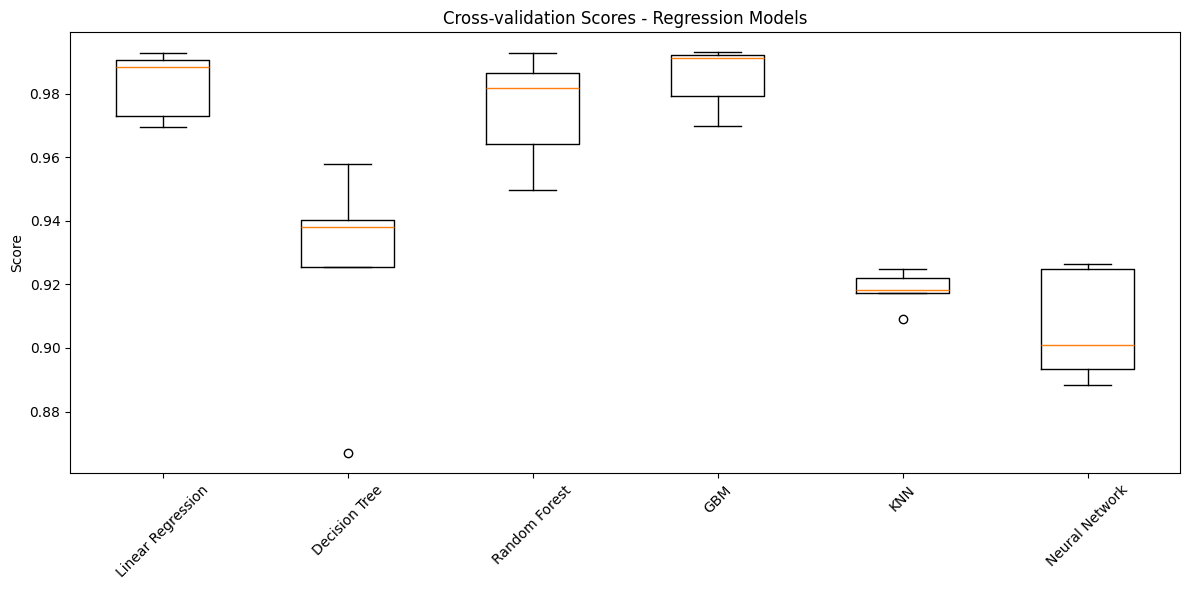

In [ ]:
# Optimize regression models
reg_results, reg_cv_results = optimizer.optimize_regression_models()
optimizer.print_optimization_results(reg_results, "Regression")
optimizer.plot_cv_results(reg_cv_results, "Regression Models")


In [ ]:
# Get best models
best_classification_models = {
    name: results["best_model"] for name, results in class_results.items()
}
best_regression_models = {
    name: results["best_model"] for name, results in reg_results.items()
}

# Save best models and results
optimization_output = {
    "classification": {
        "results": class_results,
        "cv_results": class_cv_results,
        "best_models": best_classification_models,
    },
    "regression": {
        "results": reg_results,
        "cv_results": reg_cv_results,
        "best_models": best_regression_models,
    },
}

In [ ]:
# Extract the results
results = optimization_output["classification"]["results"]

# Find the model with the highest best_score
best_model_name = None
best_model_details = None
highest_score = -float("inf")

for model_name, details in results.items():
    if details["best_score"] > highest_score:
        highest_score = details["best_score"]
        best_model_name = model_name
        best_model_details = details

# Output the best model details
print(f"Best Model: {best_model_name}")
print(f"Best Score: {highest_score}")
print(f"Best Params: {best_model_details['best_params']}")
print(f"Best Model Object: {best_model_details['best_model']}")
best_class_model = best_model_details["best_model"]

Best Model: SVM
Best Score: 0.8615389597606278
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Model Object: SVC(C=0.1, kernel='linear', probability=True)


In [ ]:
best_class_model

SVC(C=0.1, kernel='linear', probability=True)

In [ ]:
# Extract the results
results = optimization_output["regression"]["results"]

# Find the model with the highest best_score
best_model_name = None
best_model_details = None
highest_score = -float("inf")

for model_name, details in results.items():
    if details["best_score"] > highest_score:
        highest_score = details["best_score"]
        best_model_name = model_name
        best_model_details = details

# Output the best model details
print(f"Best Model: {best_model_name}")
print(f"Best Score: {highest_score}")
print(f"Best Params: {best_model_details['best_params']}")
print(f"Best Model Object: {best_model_details['best_model']}")
best_reg_model = best_model_details["best_model"]

Best Model: Linear Regression
Best Score: 0.9857933606118824
Best Params: {}
Best Model Object: LinearRegression()


In [ ]:
best_reg_model

LinearRegression()

In [ ]:
best_reg_model.predict([list(X_test_reg.iloc[0])])

array([3.37801982])

In [ ]:
y_test_reg.iloc[0]

np.float64(3.36)

In [ ]:
# After training your models
import joblib

# Save the best models
joblib.dump(best_class_model, "best_classification_model.joblib")
joblib.dump(best_reg_model, "best_regression_model.joblib")
joblib.dump(model_impl.scaler, "scaler.joblib")
joblib.dump(model_impl.le, "label_encoder.joblib")

['label_encoder.joblib']

In [ ]:
model_impl.le

LabelEncoder()